 # Low Contrast Detectability Evaluations with Pediatric-Sized QA Phantoms
 Brandon J. Nelson
 2023-02-03
 # Background
 This script generates plots from the `LCD_results.csv` file produced by `main_lcd_catphanSim.m` to visualize
 the relationships between phantom size, reconstruction method, lesion size, dose level on low contrast
 detectability in terms of area under the roc curve (AUC) and detectability signal to noise (SNR) which are
 outputs from the model observers available here <https://github.com/DIDSR/LCD_CT>
 ## Looking at the results from `main_lcd_catphanSim.m`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
lcd_data = pd.read_csv('/home/brandon.nelson/Dev/DLIR_Ped_Generalizability/geomtric_phantom_studies/results/LCD/LCD_results.csv')

lcd_data.replace('dl_REDCNN', 'dlir', inplace=True)
lcd_data.rename(columns={'patient_diameter_mm': 'phantom diameter [mm]', 'dose_level_pct': 'dose [%]'}, inplace=True)
lcd_data = lcd_data[lcd_data['phantom diameter [mm]'] != 200] #ref has large fov
print(f"{len(lcd_data['observer'].unique())} observers X {len(lcd_data['phantom diameter [mm]'].unique())} phantom diameters\
      X {len(lcd_data['insert_HU'].unique())} lesion inserts per image X {len(lcd_data['recon'].unique())} recon types\
      X {len(lcd_data['dose [%]'].unique())} dose levels X {len(lcd_data['reader'].unique())} readers = {len(lcd_data)} LCD measurements")
lcd_data.head()

3 observers X 6 phantom diameters      X 4 lesion inserts per image X 2 recon types      X 7 dose levels X 10 readers = 10080 LCD measurements


observer  phantom diameter [mm]  fov_size_mm  insert_HU  \
0  Laguerre-Gauss CHO 2D                    112        123.2         14   
1  Laguerre-Gauss CHO 2D                    112        123.2         14   
2  Laguerre-Gauss CHO 2D                    112        123.2         14   
3  Laguerre-Gauss CHO 2D                    112        123.2         14   
4  Laguerre-Gauss CHO 2D                    112        123.2         14   

   insert_diameter_pix  pixel_size_mm recon  dose_photons  dose [%]      auc  \
0               9.3208       0.240625   fbp         30000        10  0.61100   
1               9.3208       0.240625   fbp         30000        10  0.63152   
2               9.3208       0.240625   fbp         30000        10  0.59074   
3               9.3208       0.240625   fbp         30000        10  0.63362   
4               9.3208       0.240625   fbp         30000        10  0.61454   

        snr  reader  
0  0.400232       1  
1  0.479607       2  
2  0.365407       3  
3  0.522721       4  
4  0.423831       5

In [2]:
lcd_data.tail() 

observer  phantom diameter [mm]  fov_size_mm  insert_HU  \
11755  NPWE 2D                    292        321.2          3   
11756  NPWE 2D                    292        321.2          3   
11757  NPWE 2D                    292        321.2          3   
11758  NPWE 2D                    292        321.2          3   
11759  NPWE 2D                    292        321.2          3   

       insert_diameter_pix  pixel_size_mm recon  dose_photons  dose [%]  \
11755                31.07       0.627344  dlir        300000       100   
11756                31.07       0.627344  dlir        300000       100   
11757                31.07       0.627344  dlir        300000       100   
11758                31.07       0.627344  dlir        300000       100   
11759                31.07       0.627344  dlir        300000       100   

           auc       snr  reader  
11755  0.51954  0.049587       6  
11756  0.56644  0.218666       7  
11757  0.54204  0.143803       8  
11758  0.56500  0.208873       9  
11759  0.58842  0.301199      10

In [3]:
insert_HU_size = {14 : '3 mm', 7: '5 mm', 5: '7 mm', 3: '10 mm'}
observers = lcd_data['observer'].unique()
observers

array(['Laguerre-Gauss CHO 2D', 'NPW 2D', 'NPWE 2D'], dtype=object)

 ## Getting the Mean and Standard Deviation
 Use the dataframe `groupby` method to group the data by the following groups (all groups except reader number), and then take the mean
 and standard deviation across `reader`. Leave `dose [%]` as last `groupby` item to be able plot against it later

In [4]:
grouped = lcd_data.groupby(["phantom diameter [mm]","recon", "insert_HU", "observer", "dose [%]"])

lcd_mean = grouped.mean()
lcd_std = grouped.std()
lcd_mean

fov_size_mm  \
phantom diameter [mm] recon insert_HU observer              dose [%]                
112                   dlir  3         Laguerre-Gauss CHO 2D 10              123.2   
                                                            25              123.2   
                                                            40              123.2   
                                                            55              123.2   
                                                            70              123.2   
...                                                                           ...   
292                   fbp   14        NPWE 2D               40              321.2   
                                                            55              321.2   
                                                            70              321.2   
                                                            85              321.2   
                                                            100             321.2   

                                                                      insert_diameter_pix  \
phantom diameter [mm] recon insert_HU observer              dose [%]                        
112                   dlir  3         Laguerre-Gauss CHO 2D 10                    31.0700   
                                                            25                    31.0700   
                                                            40                    31.0700   
                                                            55                    31.0700   
                                                            70                    31.0700   
...                                                                                   ...   
292                   fbp   14        NPWE 2D               40                     9.3208   
                                                            55                     9.3208   
                                                            70                     9.3208   
                                                            85                     9.3208   
                                                            100                    9.3208   

                                                                      pixel_size_mm  \
phantom diameter [mm] recon insert_HU observer              dose [%]                  
112                   dlir  3         Laguerre-Gauss CHO 2D 10             0.240625   
                                                            25             0.240625   
                                                            40             0.240625   
                                                            55             0.240625   
                                                            70             0.240625   
...                                                                             ...   
292                   fbp   14        NPWE 2D               40             0.627344   
                                                            55             0.627344   
                                                            70             0.627344   
                                                            85             0.627344   
                                                            100            0.627344   

                                                                      dose_photons  \
phantom diameter [mm] recon insert_HU observer              dose [%]                 
112                   dlir  3         Laguerre-Gauss CHO 2D 10             30000.0   
                                                            25             75000.0   
                                                            40            120000.0   
                                                            55            165000.0   
                                                            70            210000.0   
...                 

In [5]:
lcd_mean['auc'][112, 'dlir', 3, 'NPW 2D']

dose [%]
10     0.490160
25     0.541968
40     0.519292
55     0.560424
70     0.610700
85     0.578922
100    0.624102
Name: auc, dtype: float64

 # AUC and SNR vs dose

 ## First build up our plotting routines

In [6]:
from plot_LCD_v2 import LCD_Plotter

## AUC and SNR vs dose for individual inserts
Can adjust the list of observers to update the plot

In [7]:
plotter = LCD_Plotter(lcd_data)

In [8]:
plotter.recons = ['fbp' , 'dlir' , [ 'dlir', 'fbp']]

In [9]:
plotter.dose_levels = [100, 25]

In [10]:
plotter.insert_HUs = 7

In [11]:
plotter.observers = ['Laguerre-Gauss CHO 2D', 'NPW 2D']

In [12]:
plotter.plot?

Signature:
plotter.plot(
    x='dose',
    restype='auc',
    recon_cmp_method='diff',
    transpose=False,
)
Docstring: <no docstring>
File:      ~/Dev/DLIR_Ped_Generalizability/geomtric_phantom_studies/evaluation/LCD/plot_LCD_v2.py
Type:      method


{'fig0': [<matplotlib.figure.SubFigure at 0x7f4219006dc0>,
  [<AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f42190222e0>,
  [<AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f42190227c0>,
  [<AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>]],
 'fig3': [<matplotlib.figure.SubFigure at 0x7f4219022070>,
  [<AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig4': [<matplotlib.figure.SubFigure at 0x7f4219022550>,
  [<AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig5': [<matplotlib.figure.SubFigure at 0x7f4219022a30>,
  [<AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>]]}

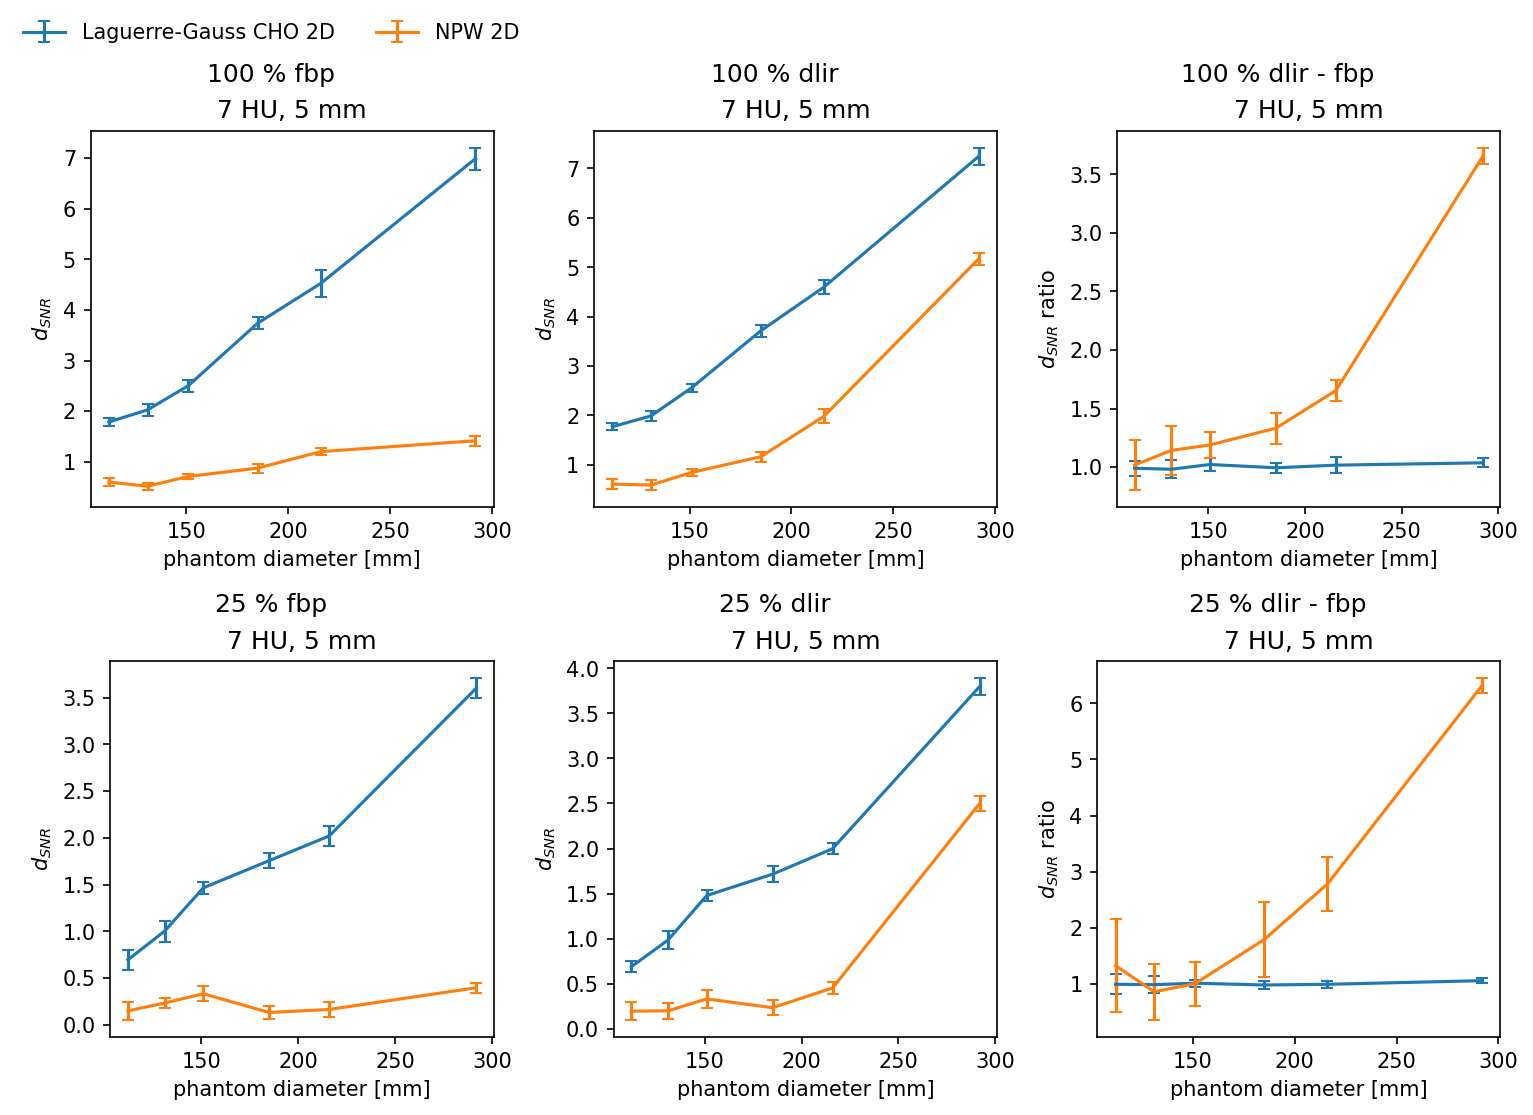

In [13]:
plotter.plot(x='diameter', restype='snr', transpose=False, recon_cmp_method='div')

Try and recreate each plot below using the Plotter class

{'fig0': [<matplotlib.figure.SubFigure at 0x7f420f7b3190>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>]]}

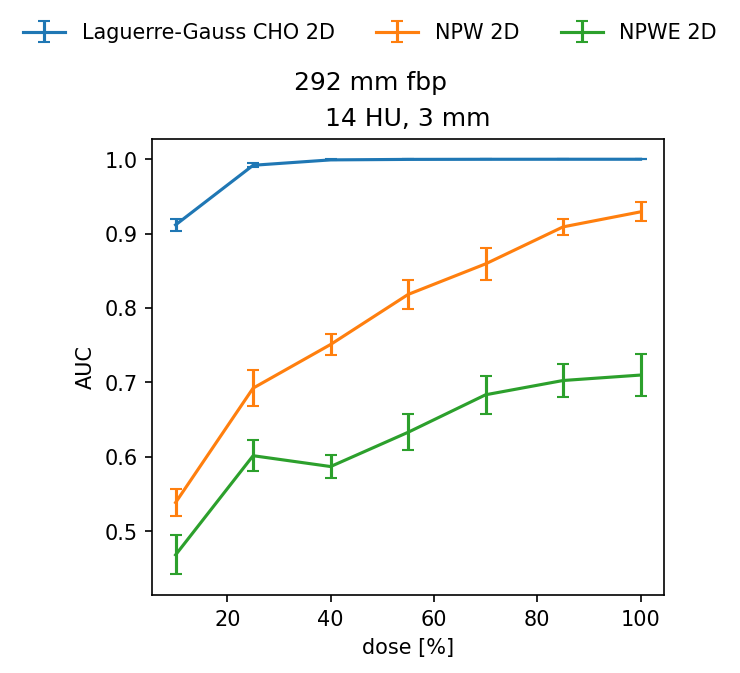

In [14]:
plotter = LCD_Plotter(lcd_data)
plotter.recons = 'fbp'
plotter.phantom_diameters = 292
plotter.insert_HUs = 14
plotter.plot(x='dose', restype='auc')

Can also change the recon type to DLIR

{'fig0': [<matplotlib.figure.SubFigure at 0x7f420fde6880>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>]]}

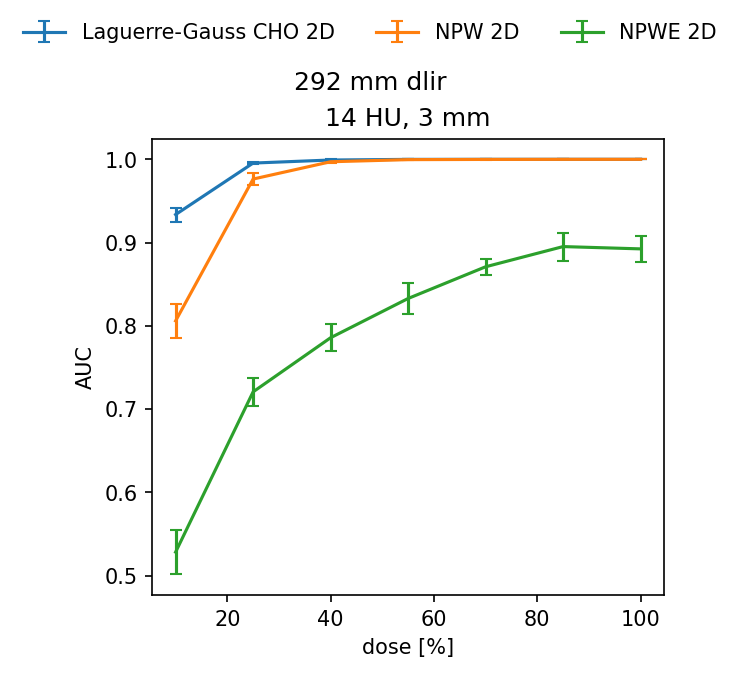

In [15]:
plotter.recons = 'dlir'
plotter.plot(x='dose', restype='auc')

{'fig0': [<matplotlib.figure.SubFigure at 0x7f420fd2bc40>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='dose [%]', ylabel='AUC'>],
        dtype=object)]}

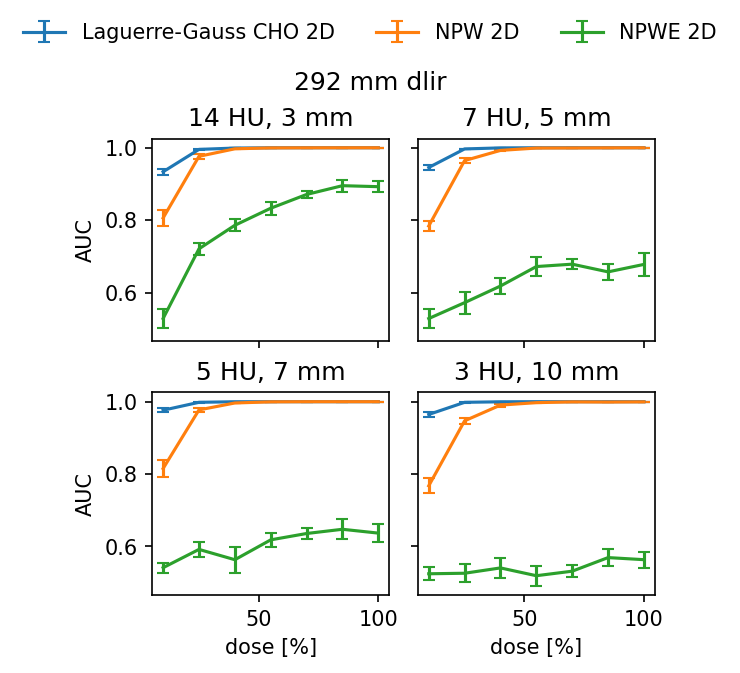

In [16]:
plotter.insert_HUs = [14, 7, 5, 3]
plotter.plot(x='dose', restype='auc')

entering 2 recon types in as a list compares them (takes the difference by default, see `recon_cmp_method`) 
if `recon_cmp_method = 'diff'` then `recon1 - recon2` if `recons = [[recon1, recon2]]` 

{'fig0': [<matplotlib.figure.SubFigure at 0x7f4210b520a0>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$\\Delta$$d_{SNR}$'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='dose [%]', ylabel='$\\Delta$$d_{SNR}$'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='$\\Delta$$d_{SNR}$'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='dose [%]', ylabel='$\\Delta$$d_{SNR}$'>],
        dtype=object)]}

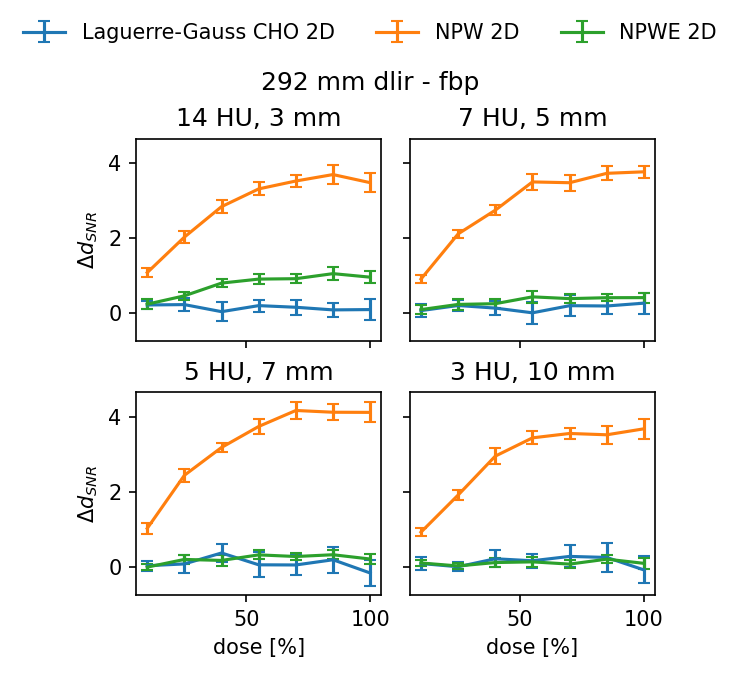

In [17]:
plotter.recons = [['dlir', 'fbp']]
plotter.plot(x='dose', restype='snr')

Can also specify which lesion inserts you want to view based on HU value(s), can enter single value or a list

In [18]:
lcd_data['insert_HU'].unique()

array([14,  7,  5,  3])

{'fig0': [<matplotlib.figure.SubFigure at 0x7f42109179d0>,
  array([<AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='$\\Delta$$d_{SNR}$'>,
         <AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$\\Delta$$d_{SNR}$'>],
        dtype=object)]}

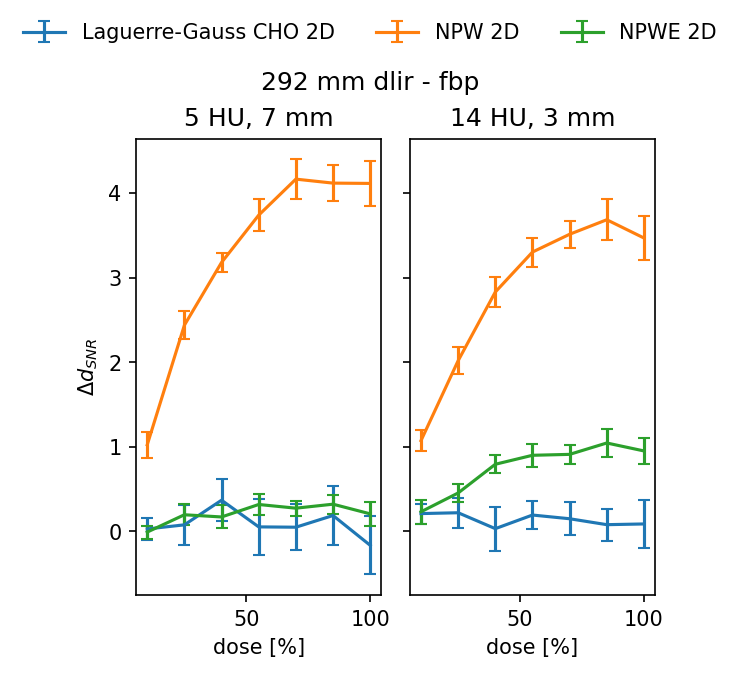

In [19]:
plotter.insert_HUs = [5, 14]
plotter.plot(x='dose', restype='snr')

 ### Let's look at everything (warning a bit overwhelming) AUC
 these could be included in the paper appendix, but for the main figures we'll want to distill this down to
 the main effects (described below)

In [20]:
plotter.phantom_diameters

292

{'fig0': [<matplotlib.figure.SubFigure at 0x7f42107e76d0>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='dose [%]', ylabel='AUC'>],
        dtype=object)],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f42107d0c40>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='dose [%]', ylabel='AUC'>],
        dtype=object)],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f42107edd60>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, x

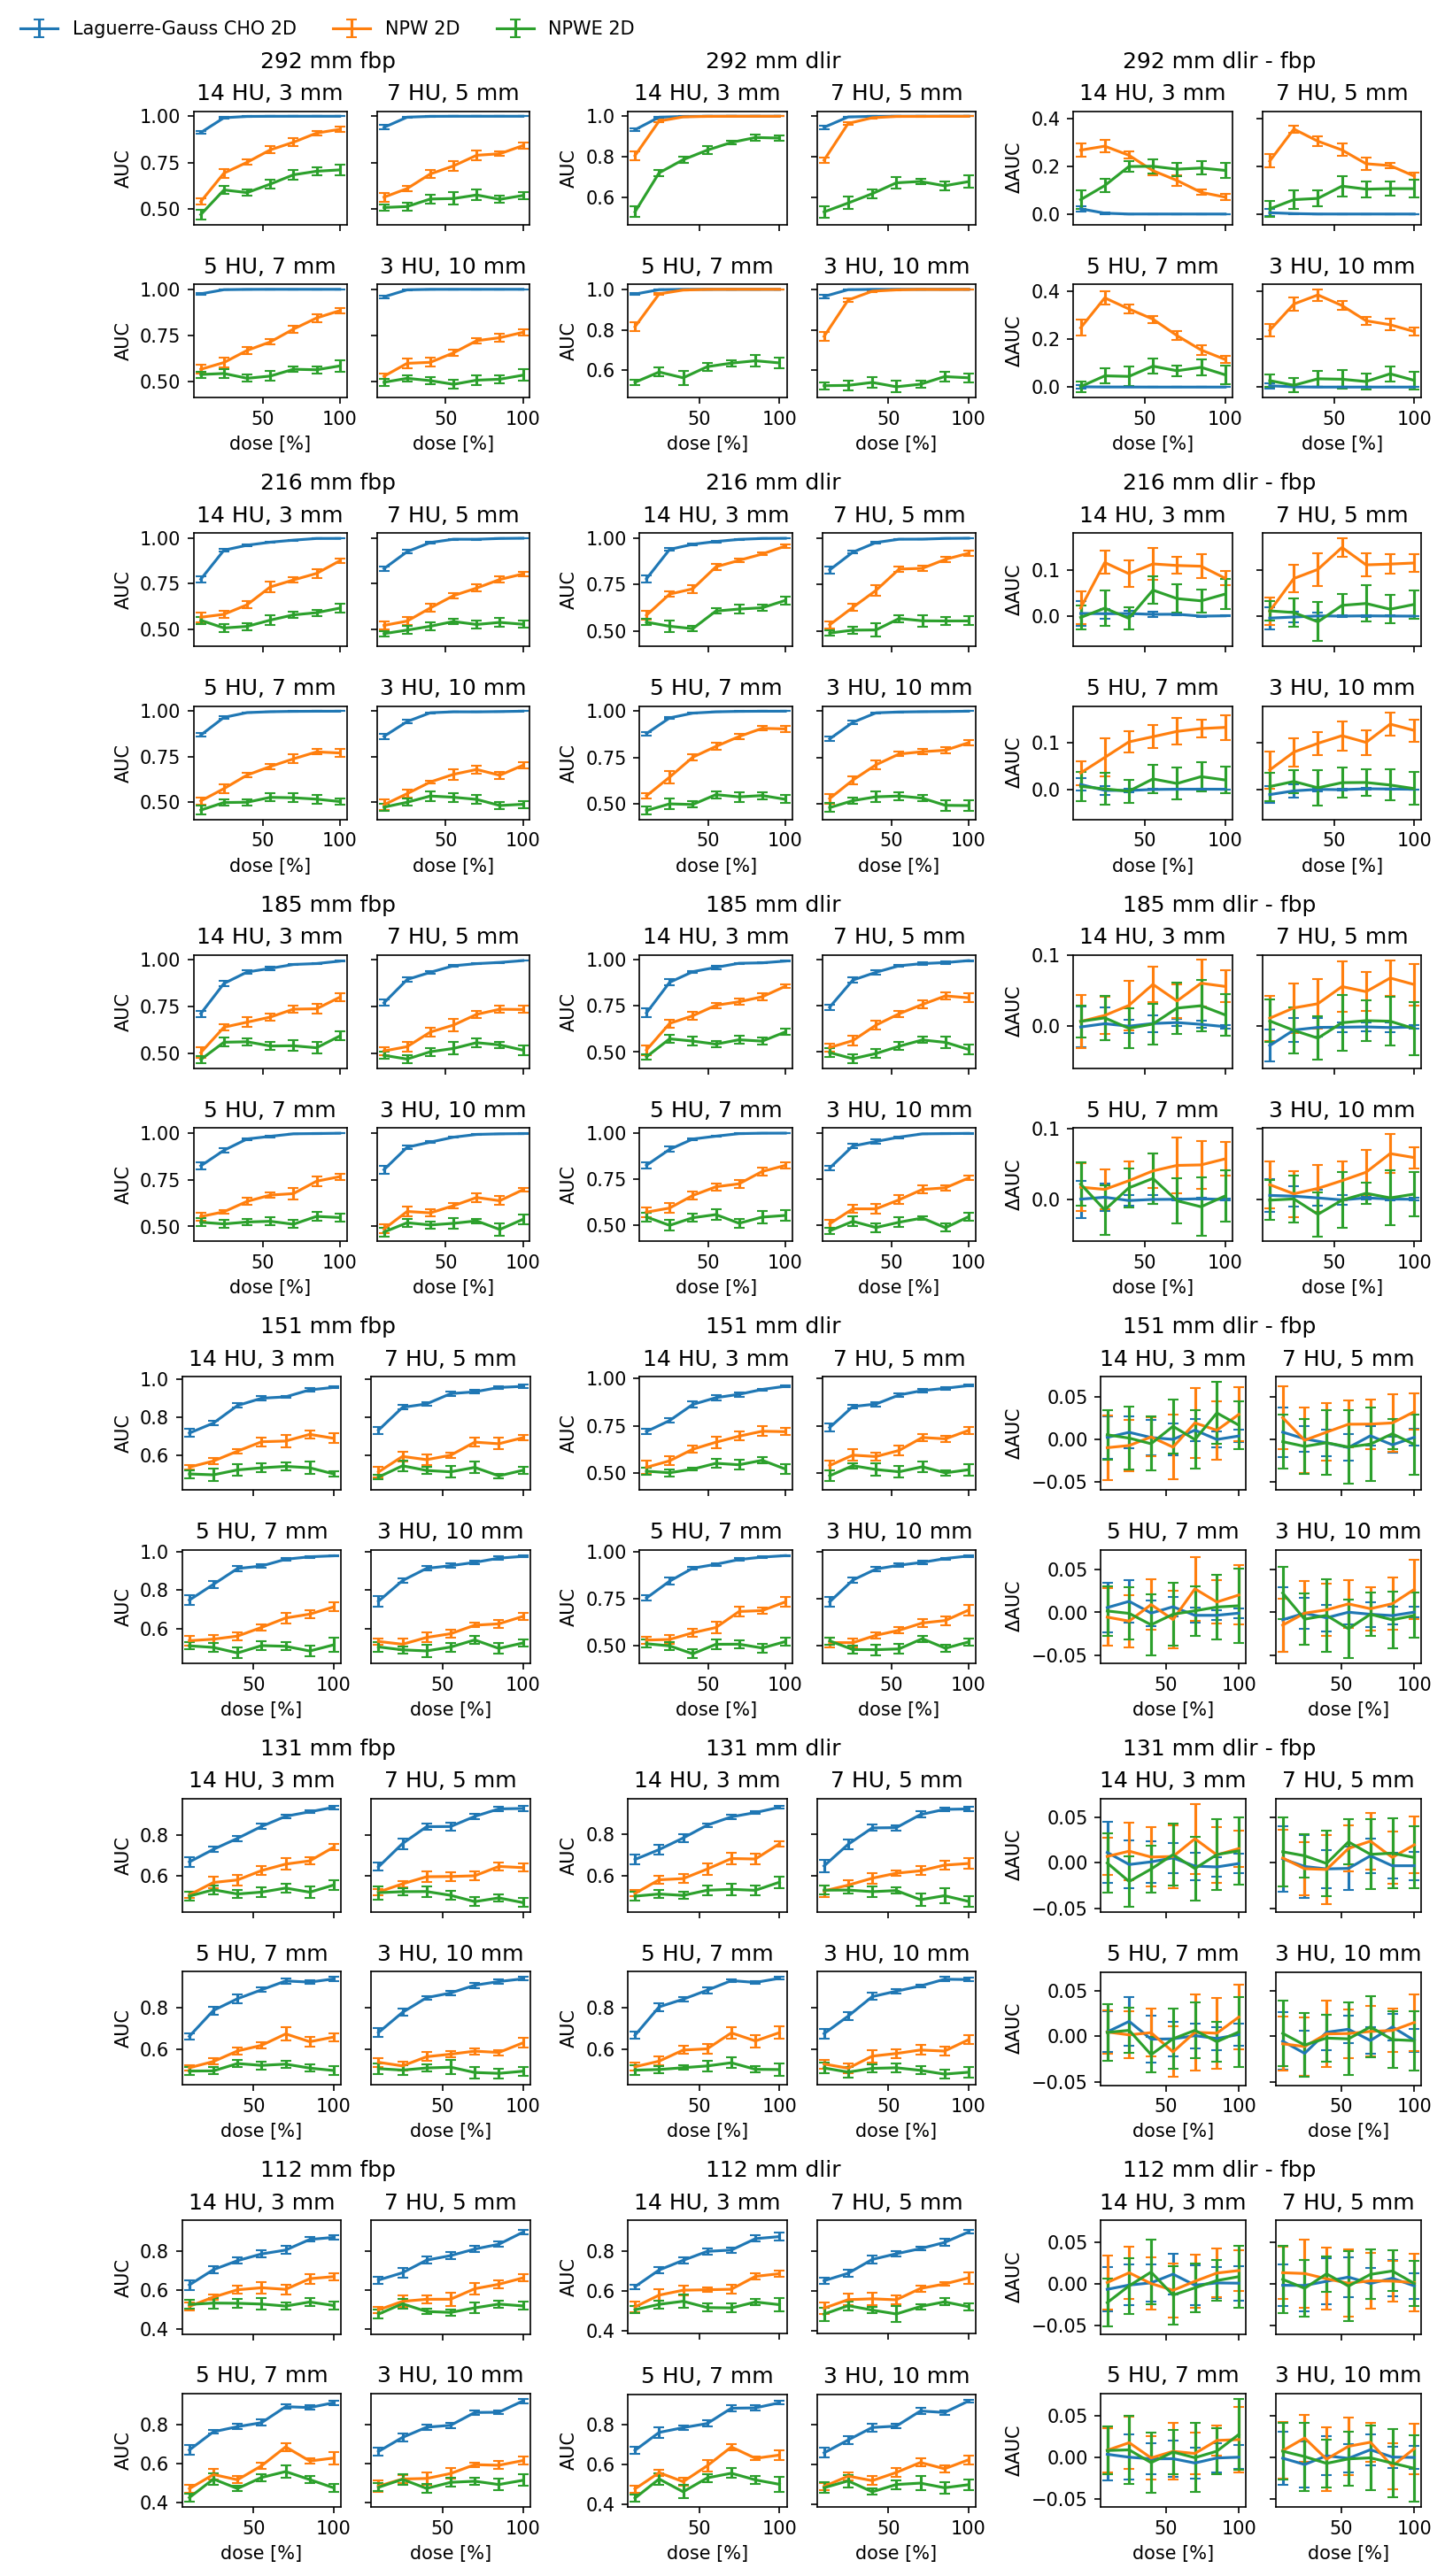

In [21]:
plotter = LCD_Plotter(lcd_data)
plotter.recons = ['fbp', 'dlir', ['dlir', 'fbp']]
plotter.phantom_diameters = sorted(plotter.phantom_diameters, reverse=True)
plotter.plot(x='dose', restype='auc')

 ## First look at everything (warning a bit overwhelming) SNR
 Same as above, these could be included in the paper appendix, but for the main figures we'll want to distill this down to
 the main effects (described below)

{'fig0': [<matplotlib.figure.SubFigure at 0x7f420c231130>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>],
        dtype=object)],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f420c40cb20>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>],
        dtype=object)],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f420c2157c0>,
  array([

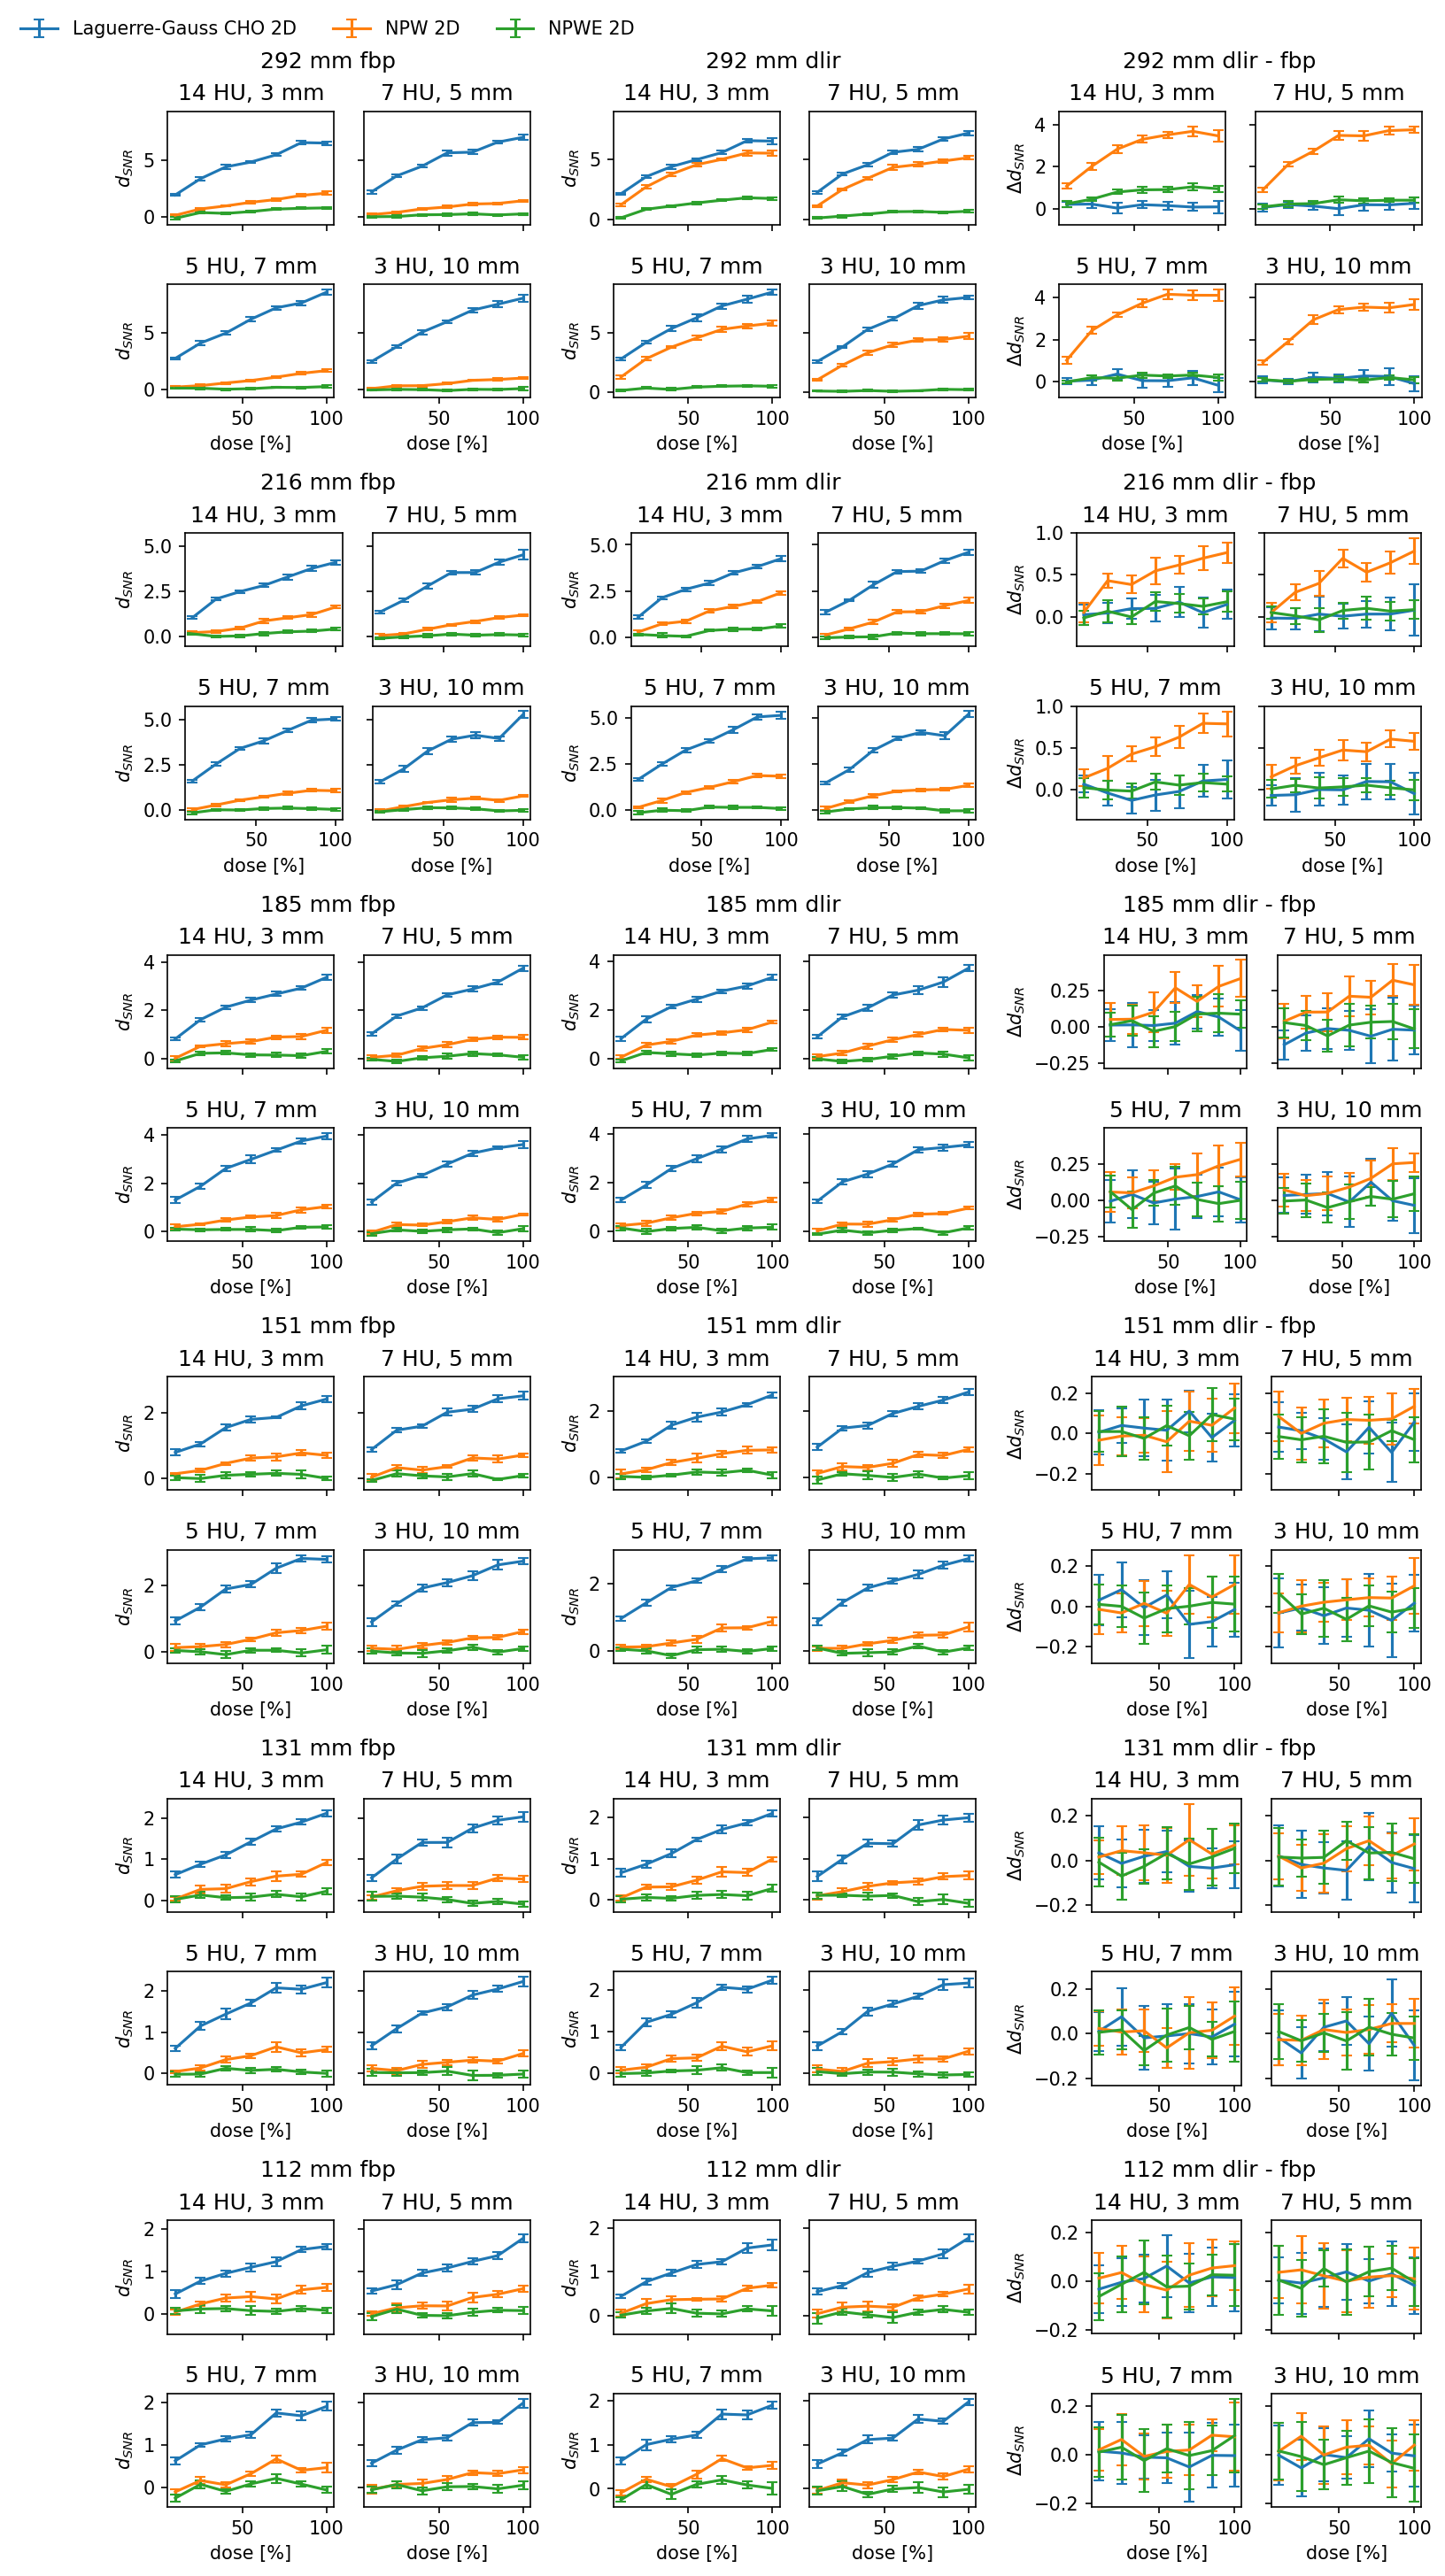

In [22]:
plotter.plot(x='dose', restype='snr')

 ## Let's now break this down into smaller chunks to better understand the relationships between variables
 ### Starting with insert size and HU
 Let's first see if there's any noticeable difference in detectability based on insert size and contrast

 ### all 4 inserts auc vs dose (no diffs)
 this shows that there's not much difference between inserts

{'fig0': [<matplotlib.figure.SubFigure at 0x7f4204cf2370>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='dose [%]', ylabel='AUC'>],
        dtype=object)],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f42055db310>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='dose [%]', ylabel='AUC'>],
        dtype=object)],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f4204cf23a0>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, x

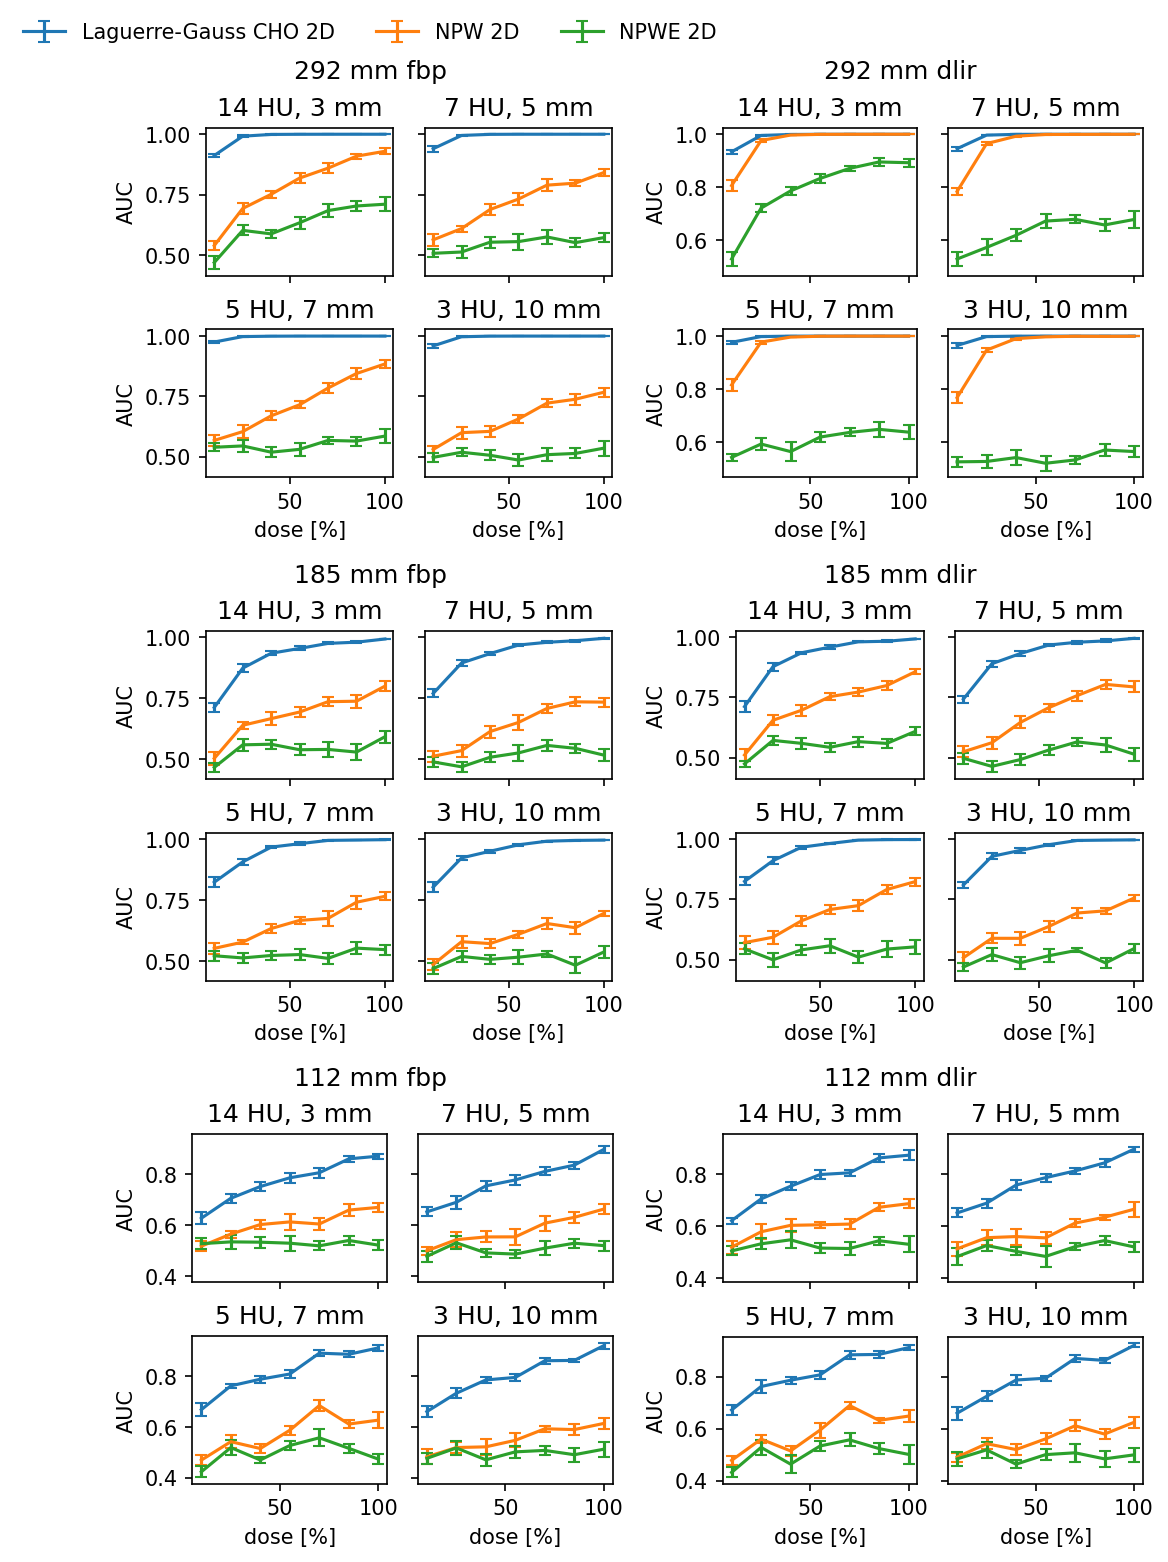

In [23]:
plotter.phantom_diameters = [292, 185, 112]
plotter.recons = ['fbp', 'dlir']
plotter.plot(x='dose', restype='auc')

### all 4 inserts snr vs dose (no diffs)
 this shows that there's not much difference between inserts

{'fig0': [<matplotlib.figure.SubFigure at 0x7f4202f2a5b0>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>],
        dtype=object)],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f4202f2ad00>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>],
        dtype=object)],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f4202f2a820>,
  array([

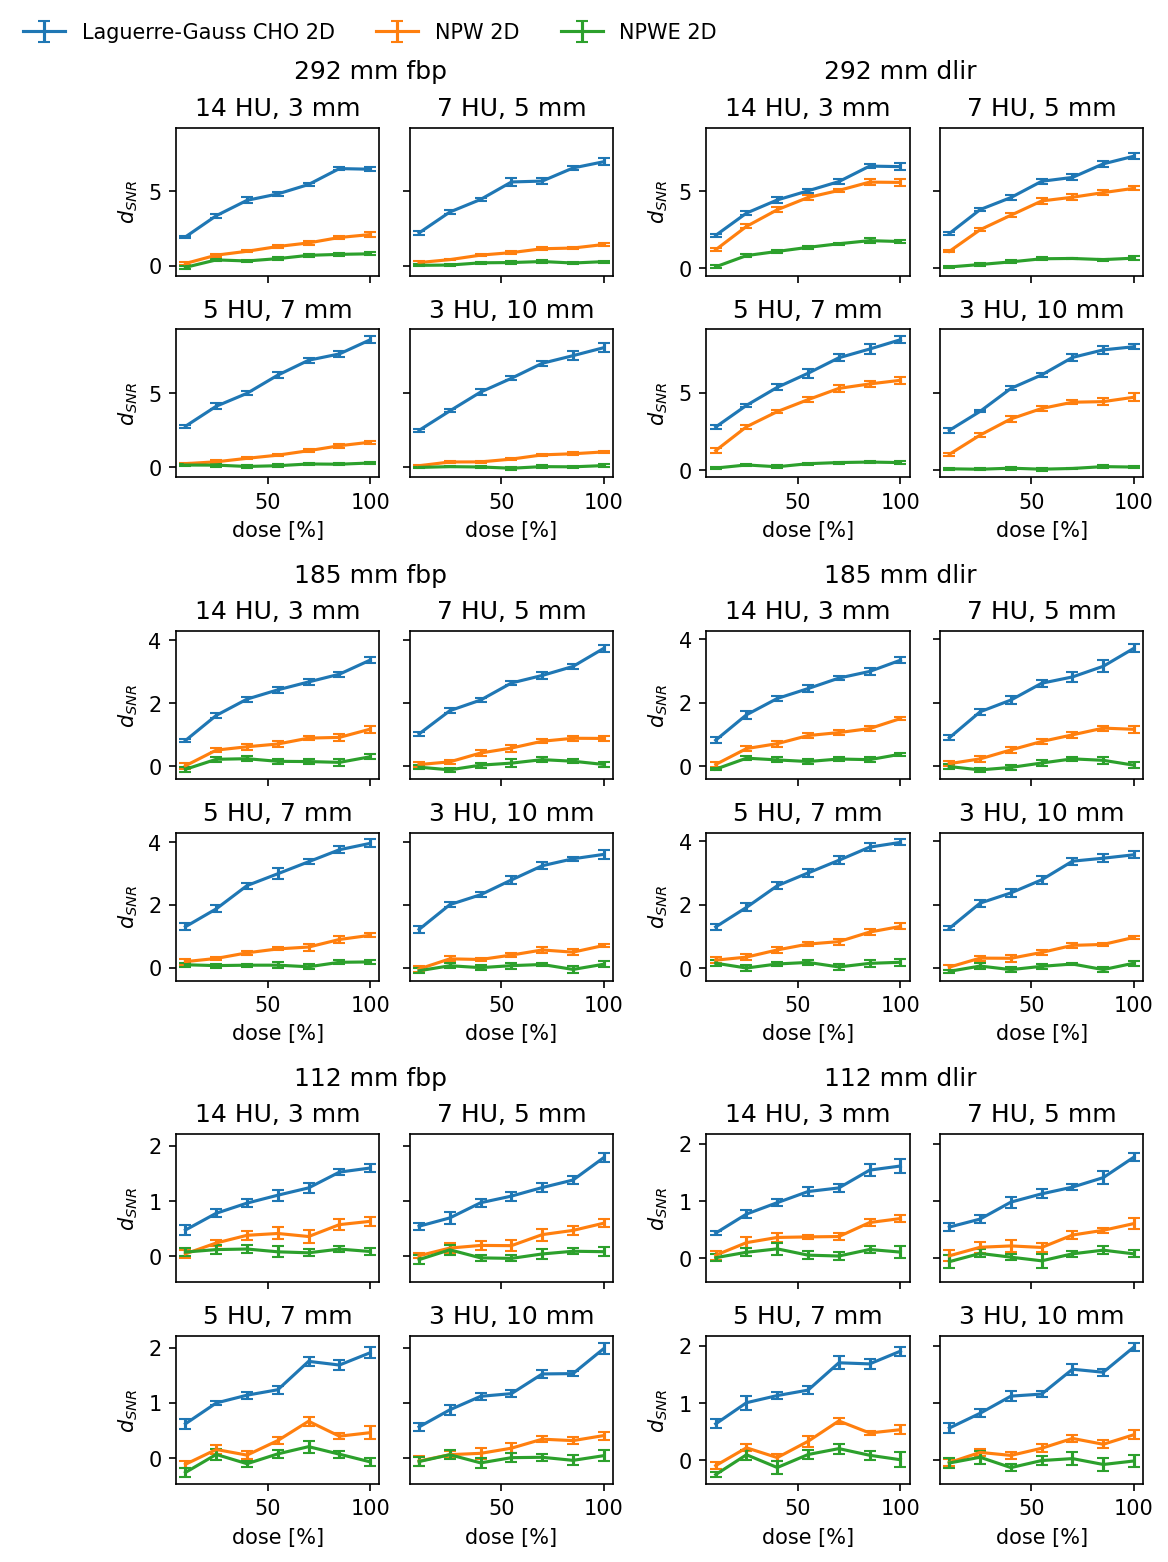

In [24]:
plotter.plot(x='dose', restype='snr')

 ## Now just 1 insert but show diffs auc

{'fig0': [<matplotlib.figure.SubFigure at 0x7f42022c69a0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>]],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f42022d7130>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>]],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f42022d7790>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$\\Delta$AUC'>]],
 'fig3': [<matplotlib.figure.SubFigure at 0x7f42022c6c10>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>]],
 'fig4': [<matplotlib.figure.SubFigure at 0x7f42022d73a0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='AUC'>]],
 'fig5': [<matplotlib.figure.SubFigure at 0x7f42022d7a00>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$\\Delta$AUC'>]],
 'fig6': [<matplotlib.figure.SubFigure at 0x7f42022c6e80>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xla

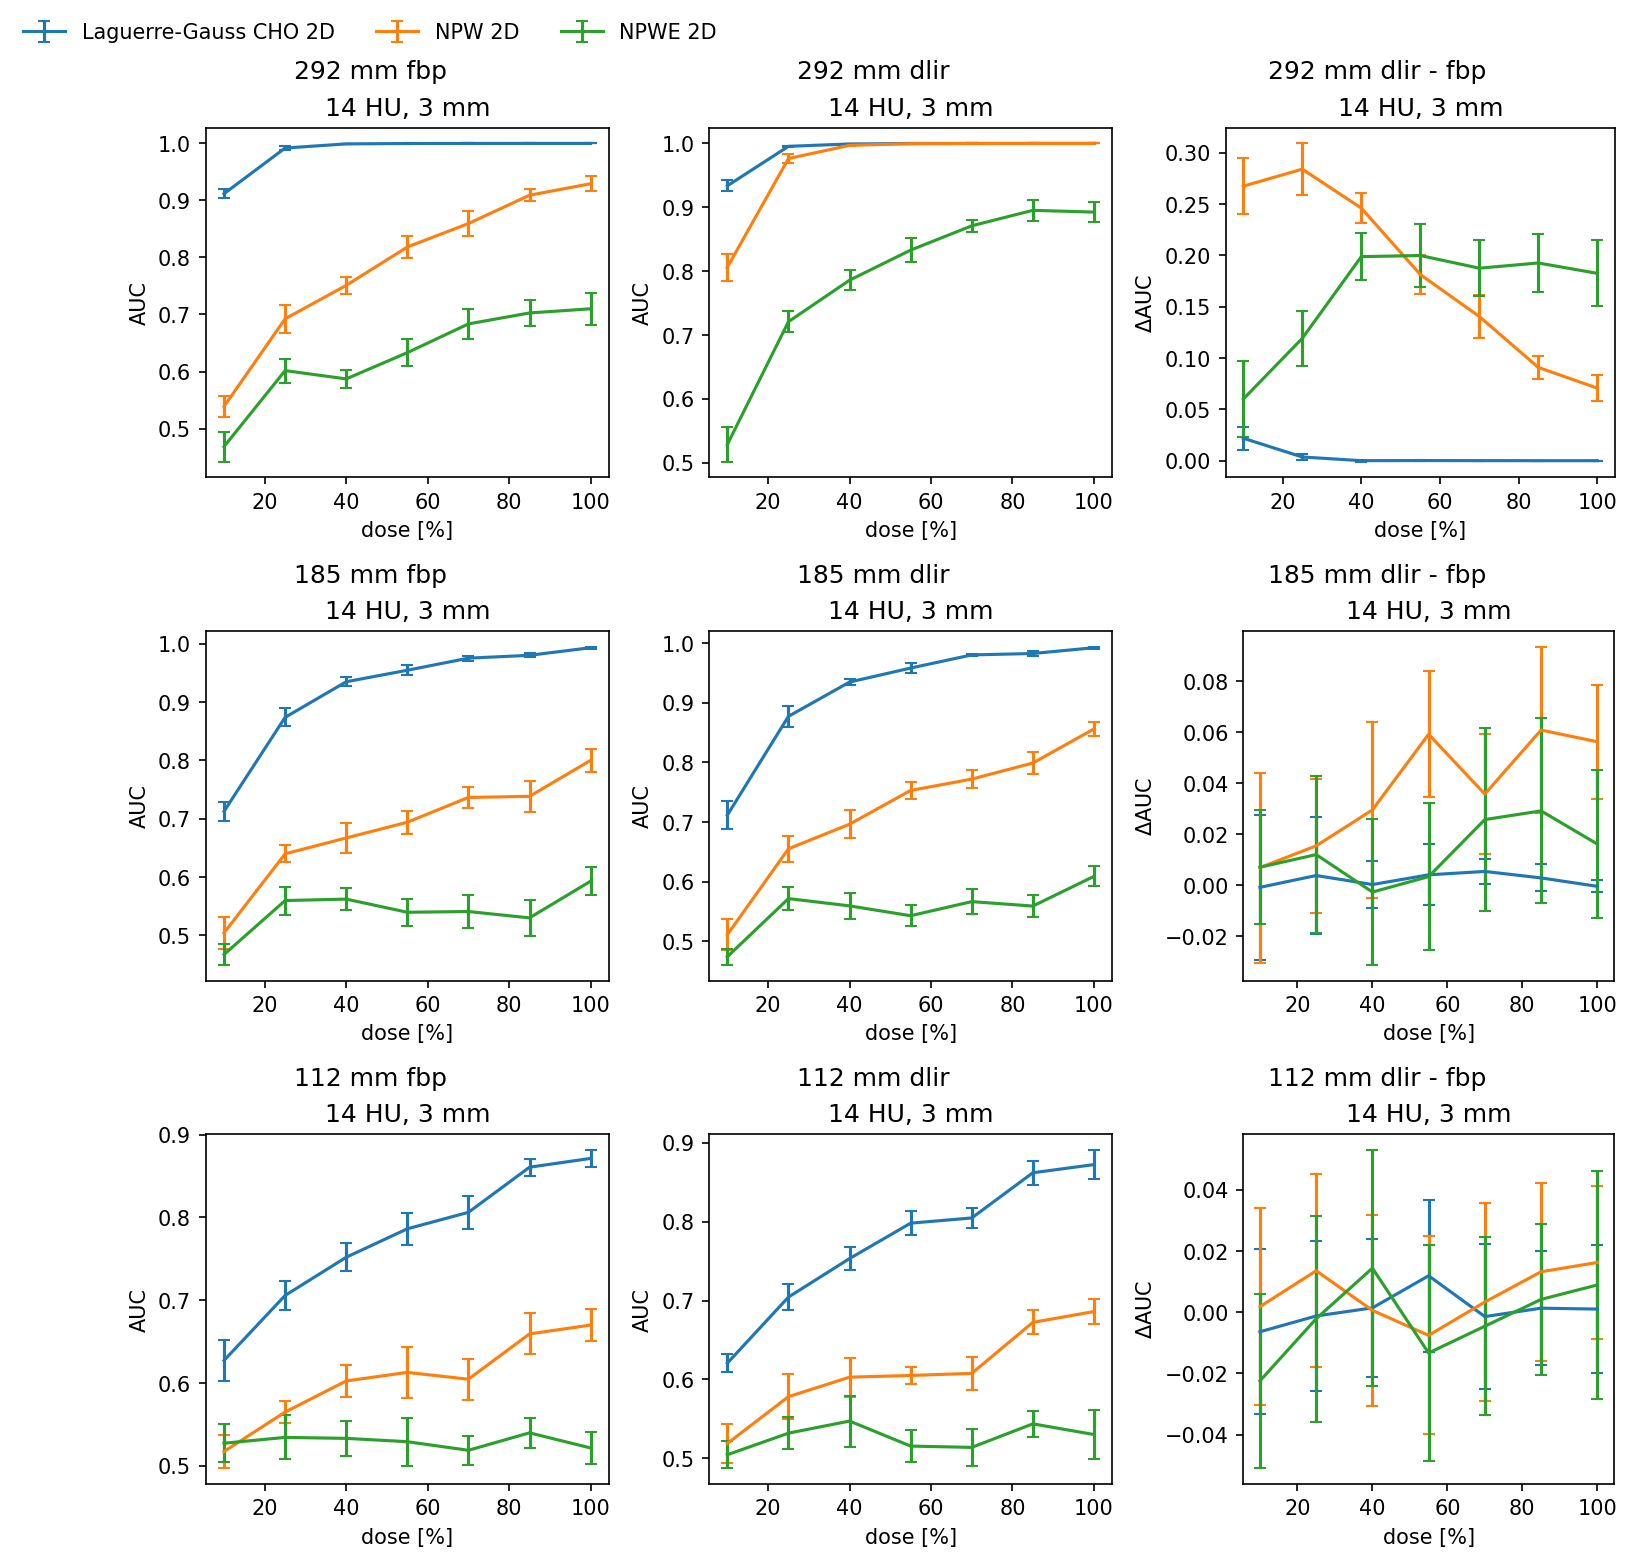

In [25]:
plotter.insert_HUs = 14
plotter.recons = ['fbp', 'dlir', ['dlir', 'fbp']]
plotter.plot(x='dose', restype='auc')

 ## Now just 1 insert but show diffs snr

{'fig0': [<matplotlib.figure.SubFigure at 0x7f4201d5af40>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>]],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f4201e82970>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>]],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f4201d667f0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$\\Delta$$d_{SNR}$'>]],
 'fig3': [<matplotlib.figure.SubFigure at 0x7f4201d661f0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>]],
 'fig4': [<matplotlib.figure.SubFigure at 0x7f4201d4db50>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$d_{SNR}$'>]],
 'fig5': [<matplotlib.figure.SubFigure at 0x7f4201d66a60>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='dose [%]', ylabel='$\\Delta$$d_{SNR}$'>]],
 'fig6': [<matplotlib.figure.SubFigure at 0x7f4201d66460>,
  [<AxesSubplot: 

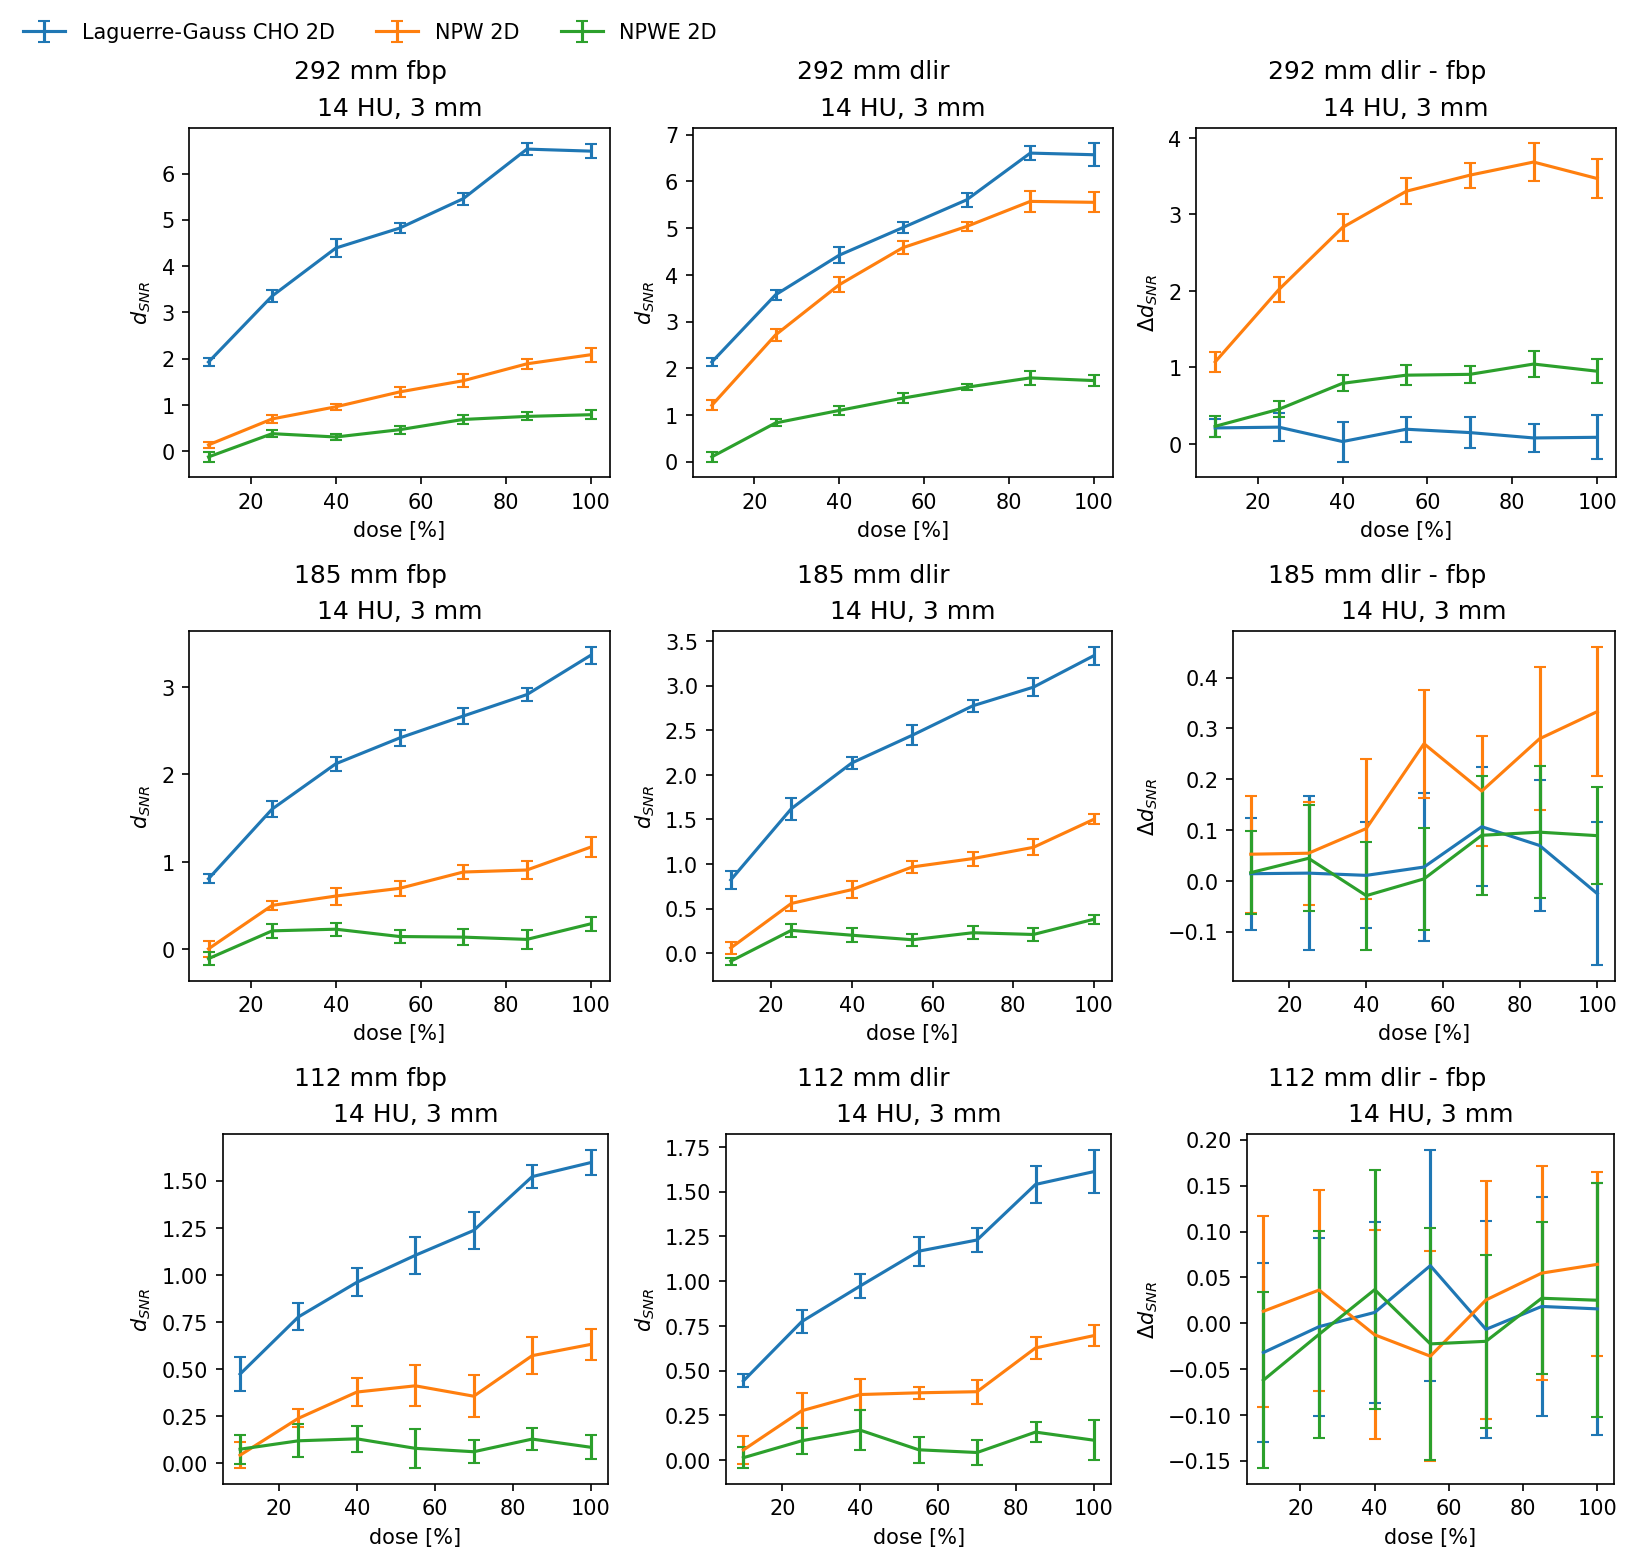

In [26]:
plotter.plot(x='dose', restype='snr')

 # diff auc vs diam

  dlir - fbp diff auc

{'fig0': [<matplotlib.figure.SubFigure at 0x7f42017a3a60>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>],
        dtype=object)]}

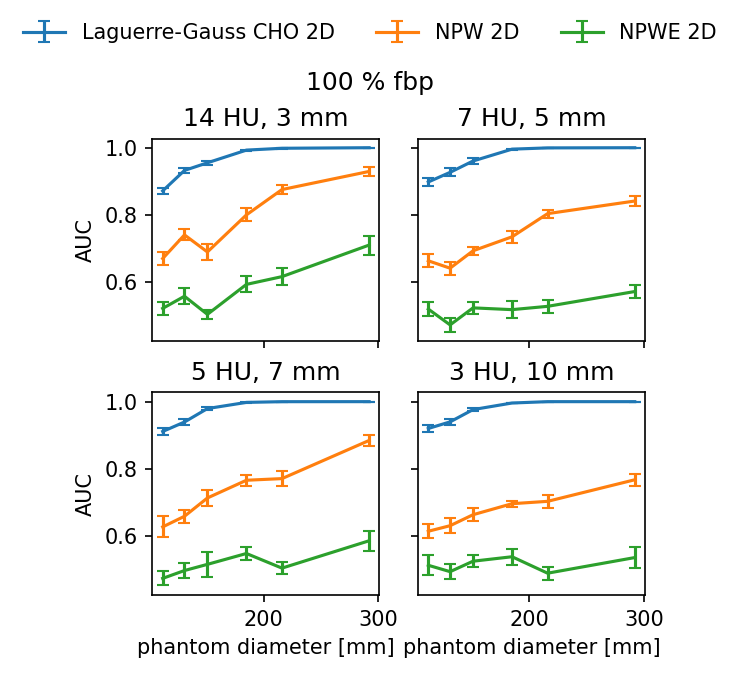

In [27]:
plotter.reset()
plotter.dose_levels = 100
plotter.recons = 'fbp'
plotter.plot(x='diameter', restype='auc')

{'fig0': [<matplotlib.figure.SubFigure at 0x7f42015b0df0>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>],
        dtype=object)],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f420153d310>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>],
        dtype=object)],
 'fig2': [<m

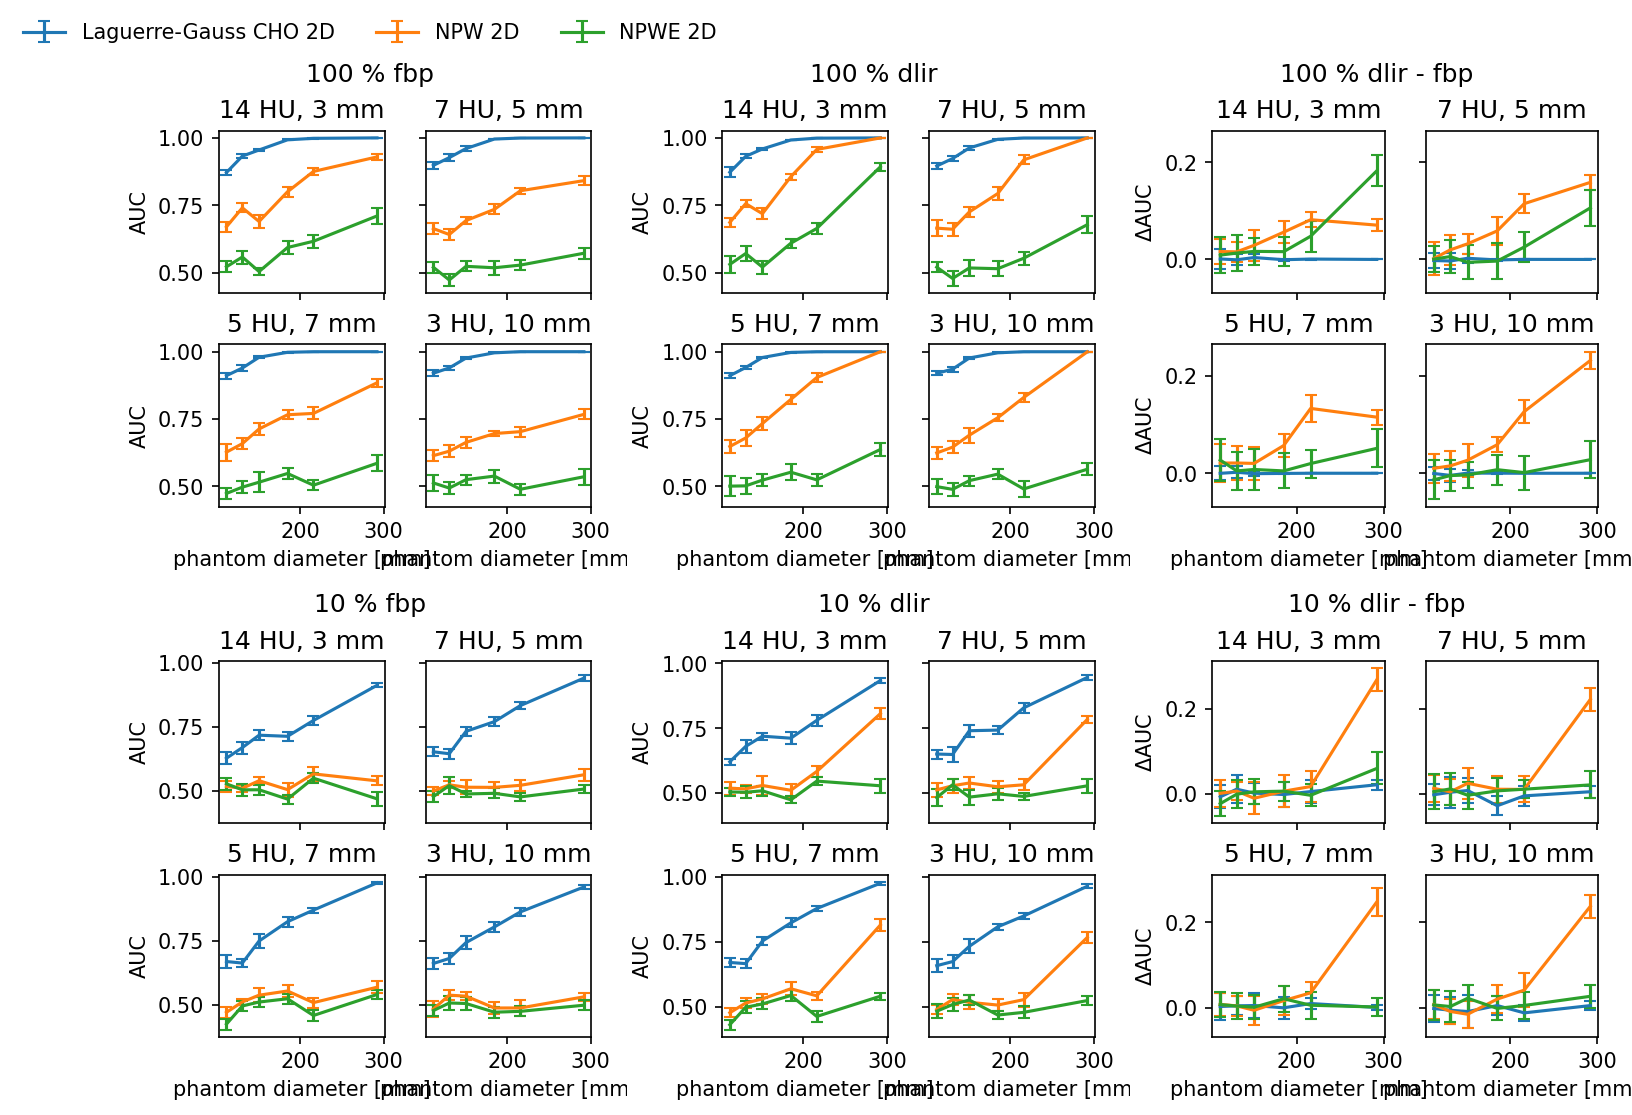

In [28]:
plotter.dose_levels = [100, 10]
plotter.recons = ['fbp', 'dlir', ['dlir', 'fbp']]
plotter.plot(restype='auc', x='diameter')

{'fig0': [<matplotlib.figure.SubFigure at 0x7f42009758b0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>]],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f4200975d90>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>]],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f420097e2b0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$\\Delta$AUC'>]],
 'fig3': [<matplotlib.figure.SubFigure at 0x7f4200975b20>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>]],
 'fig4': [<matplotlib.figure.SubFigure at 0x7f420097e040>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='AUC'>]],
 'fig5': [<matplotlib.figure.SubFigure at 0x7f420097e520>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$\\Delta$AUC'>]]}

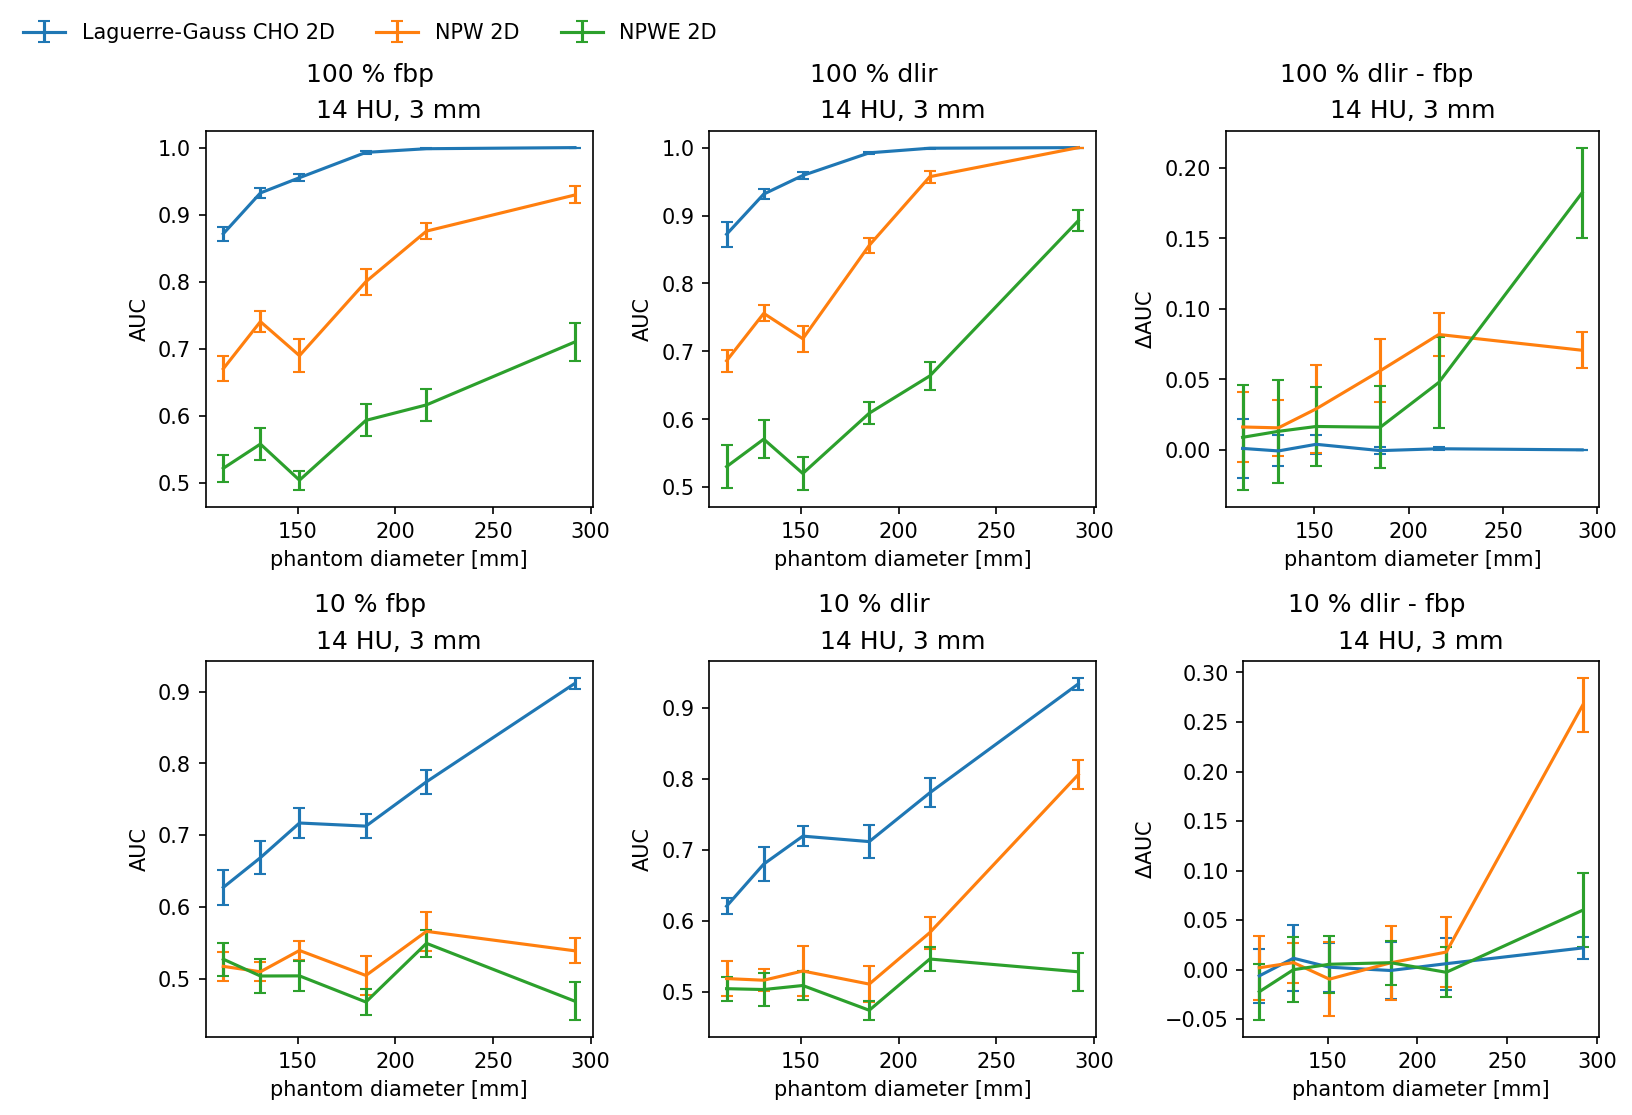

In [29]:
plotter.insert_HUs = 14
plotter.plot(restype='auc', x='diameter')

 note above that sometimes NPWE can exceed NPW in \Delta AUC because the AUC is saturated, this cross-over doesn't occur in SNR
 since we showed this earlier we probs only need to show SNR moving forward in the paper if we show the auc saturation once

 dlir - fbp diff snr

{'fig0': [<matplotlib.figure.SubFigure at 0x7f420060a550>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f420060aa30>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f42006872b0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$\\Delta$$d_{SNR}$'>]],
 'fig3': [<matplotlib.figure.SubFigure at 0x7f420060a7c0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig4': [<matplotlib.figure.SubFigure at 0x7f42006bd130>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig5': [<matplotlib.figure.SubFigure at 0x7f42006a3fd0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$\\Delta$$d_{SNR}$'>]]

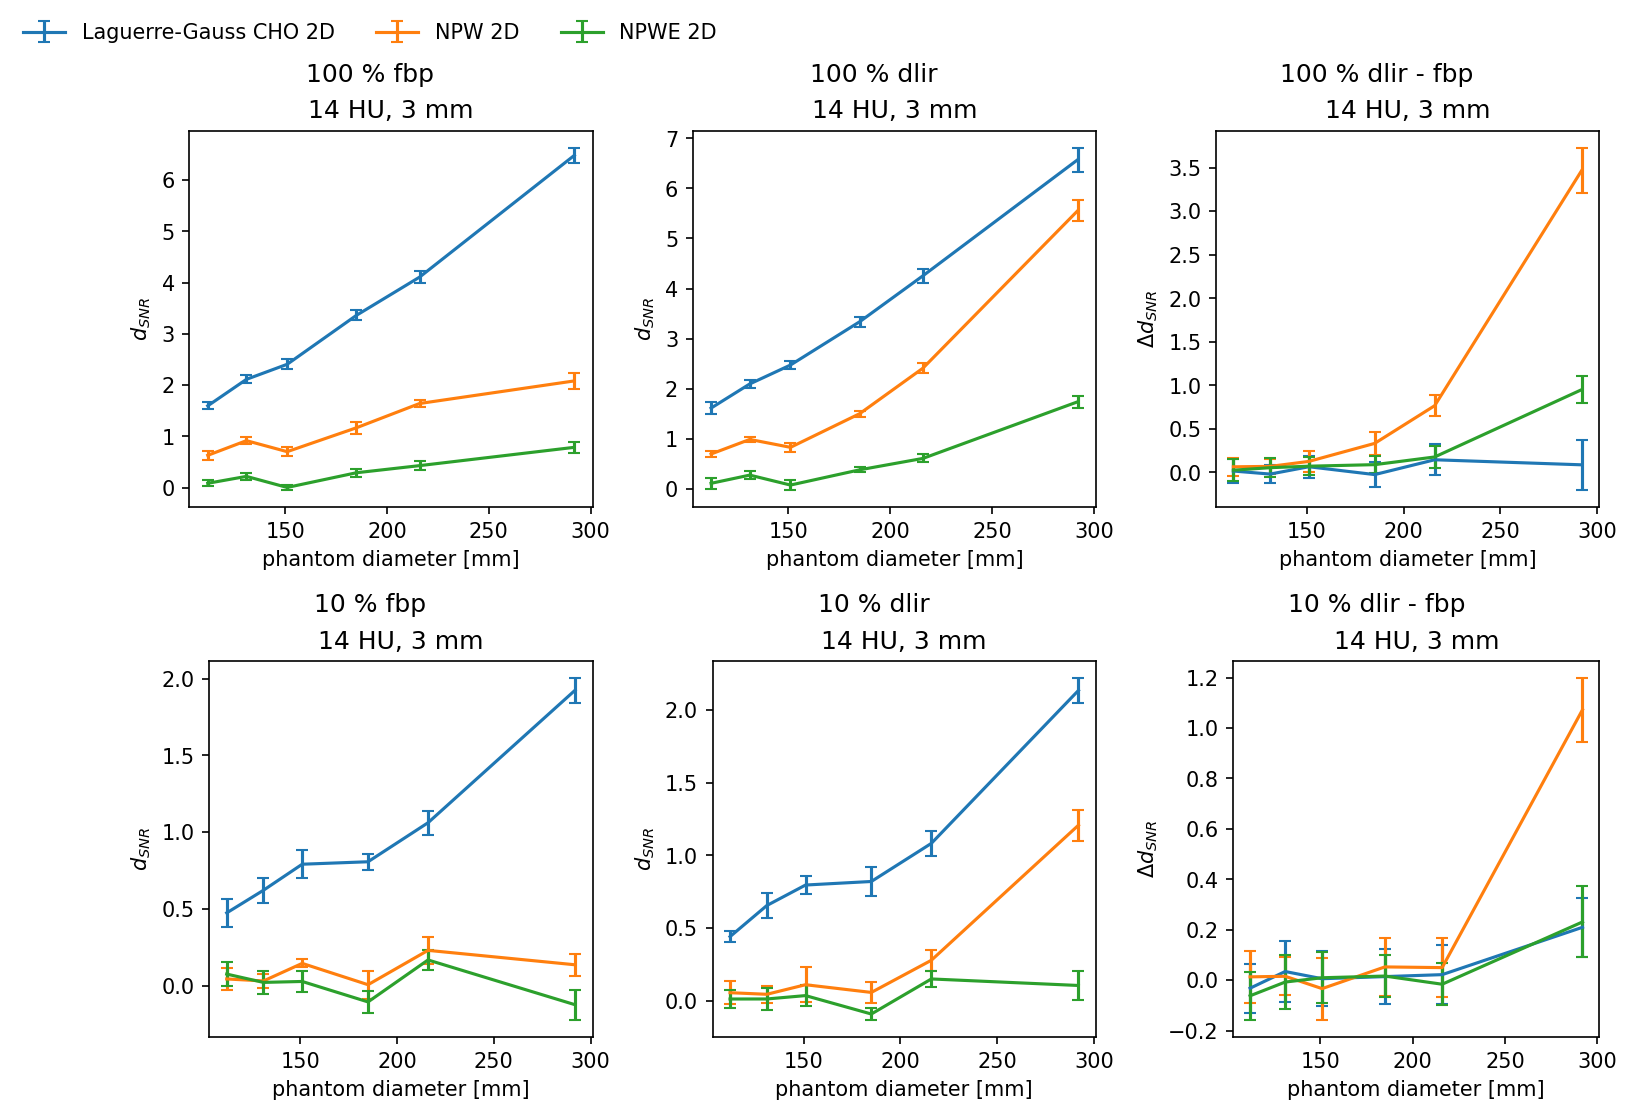

In [30]:
plotter.plot(restype='snr', x='diameter')

 ## SNR ratios

{'fig0': [<matplotlib.figure.SubFigure at 0x7f4200261940>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f4200261f10>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f420026f430>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>]],
 'fig3': [<matplotlib.figure.SubFigure at 0x7f42002614c0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig4': [<matplotlib.figure.SubFigure at 0x7f420026f1c0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig5': [<matplotlib.figure.SubFigure at 0x7f420026f6a0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>]]}

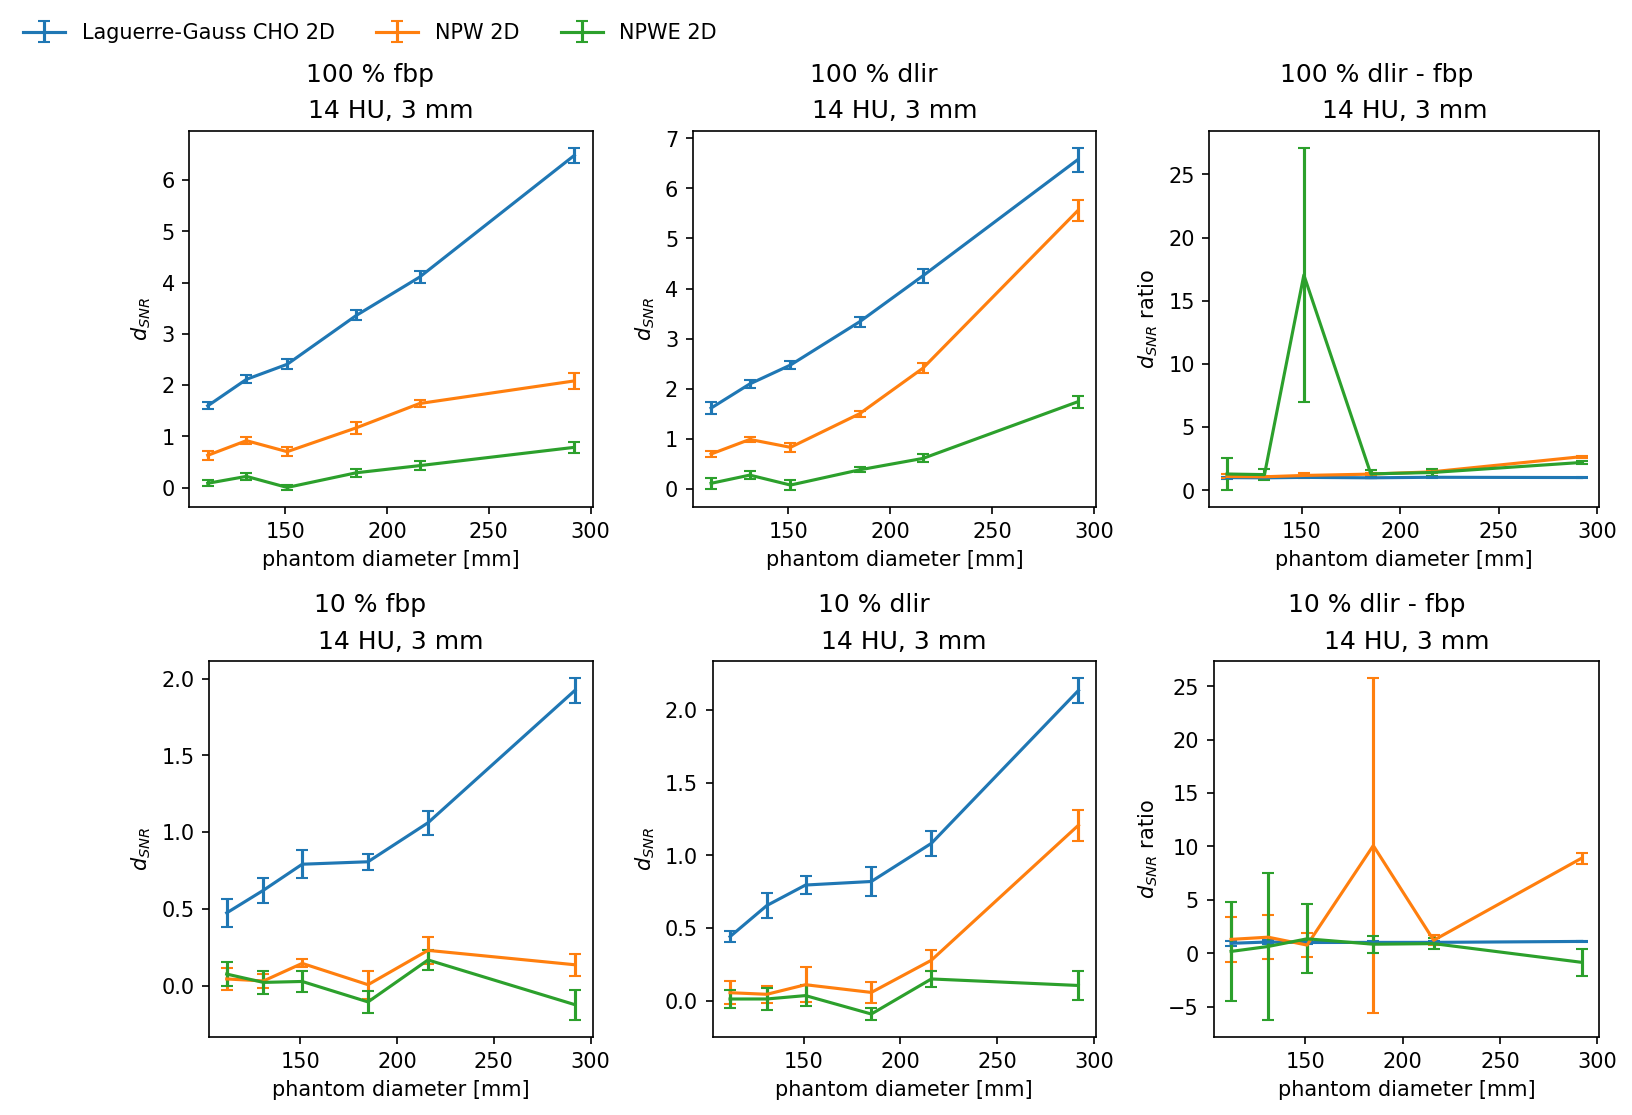

In [31]:
plotter.plot(restype='snr', x='diameter', recon_cmp_method='div')

 the ratio becomes too noisy due to NPWE 2D (eye filter) so remove it from the list of observers

{'fig0': [<matplotlib.figure.SubFigure at 0x7f41ffe84190>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f41fff0b6d0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f41ffefd820>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>]],
 'fig3': [<matplotlib.figure.SubFigure at 0x7f41fff71d30>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig4': [<matplotlib.figure.SubFigure at 0x7f41ffe84d90>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig5': [<matplotlib.figure.SubFigure at 0x7f41ffefdfd0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>]],
 'fi

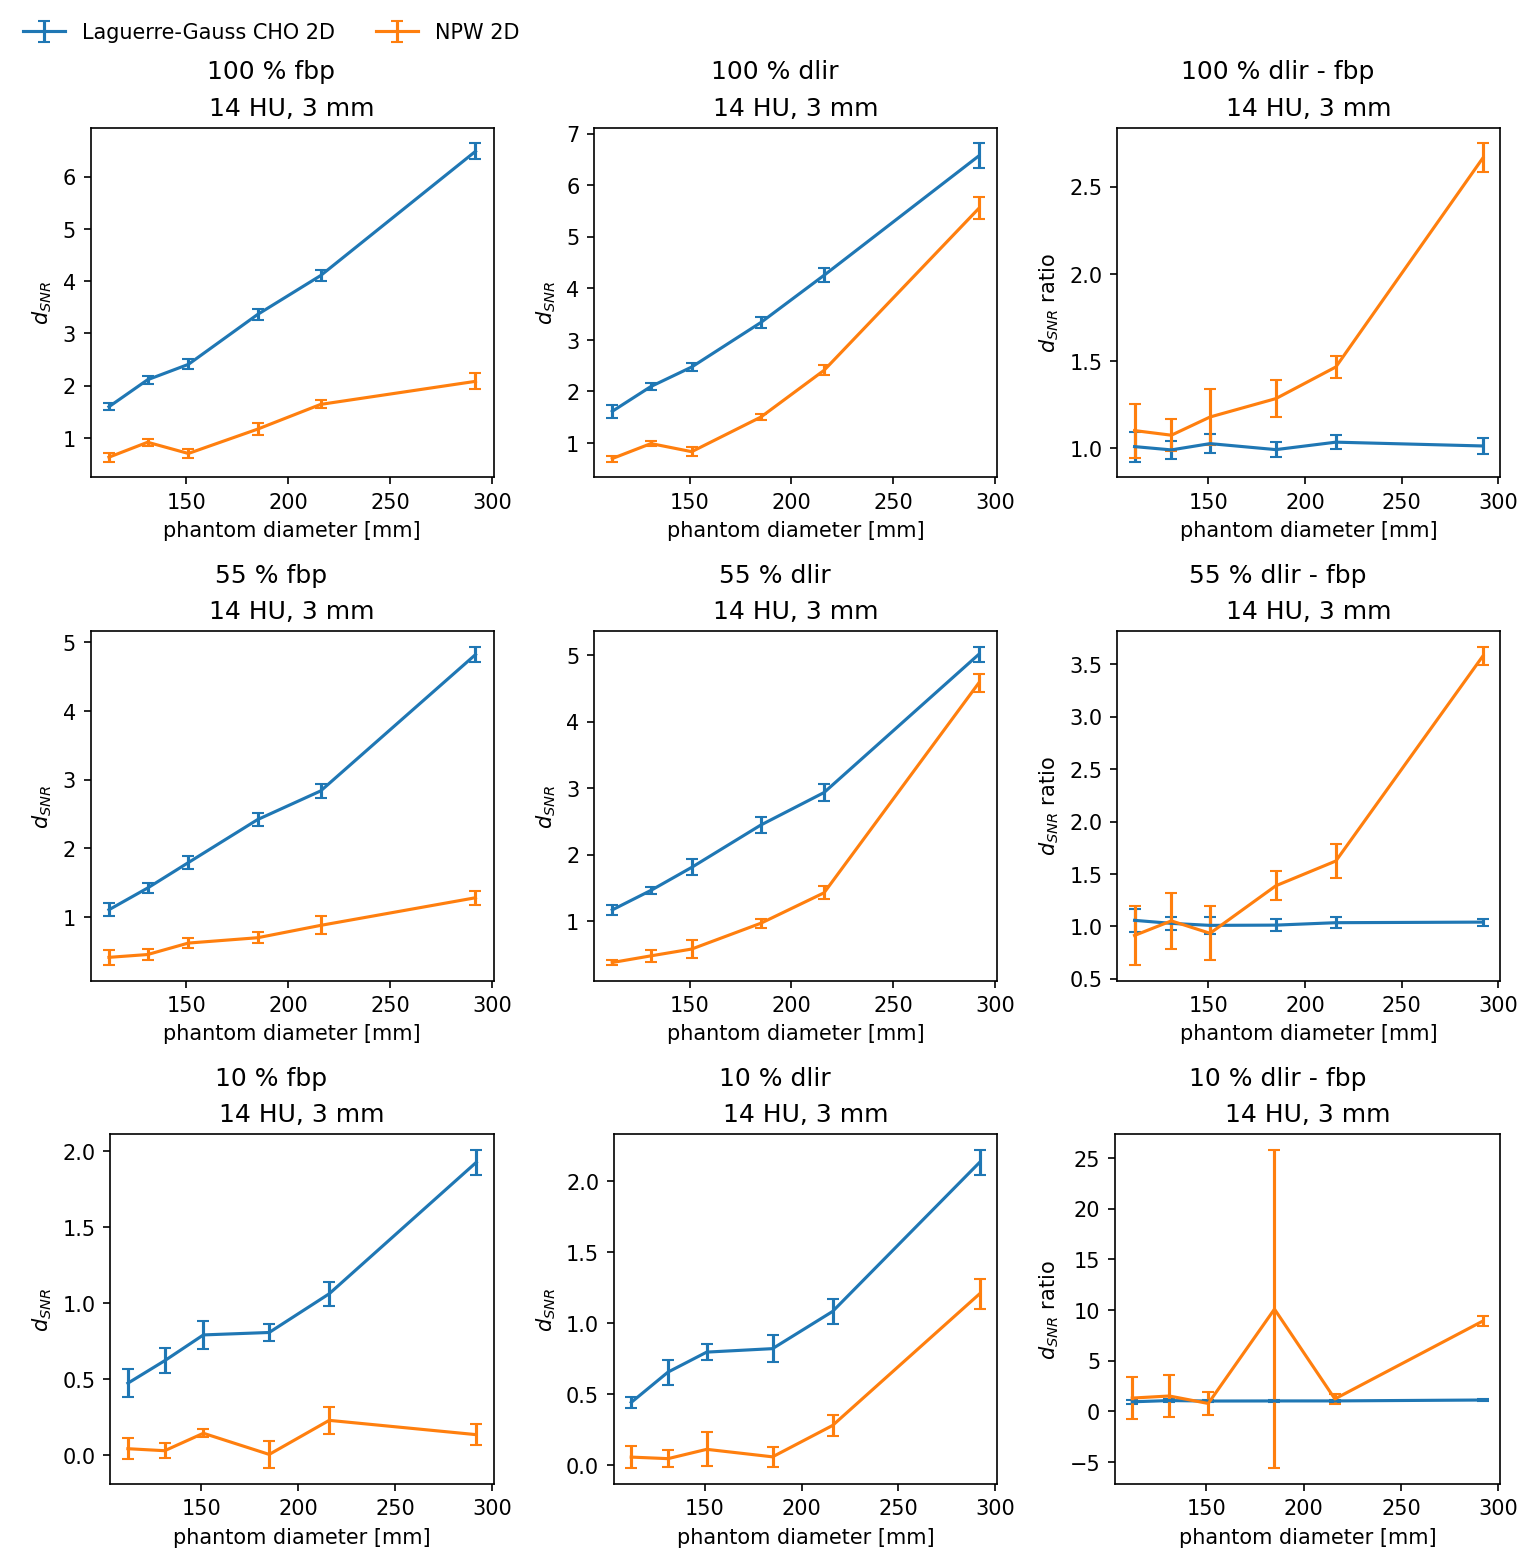

In [32]:
plotter.observers = ['Laguerre-Gauss CHO 2D', 'NPW 2D']
plotter.dose_levels = [100, 55, 10]
plotter.plot(restype='snr', x='diameter', recon_cmp_method='div')

{'fig0': [<matplotlib.figure.SubFigure at 0x7f41ff982340>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f41ff982cd0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig2': [<matplotlib.figure.SubFigure at 0x7f41ff98f1f0>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>]],
 'fig3': [<matplotlib.figure.SubFigure at 0x7f41ff982a30>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig4': [<matplotlib.figure.SubFigure at 0x7f41ff982f40>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$'>]],
 'fig5': [<matplotlib.figure.SubFigure at 0x7f41ff98f460>,
  [<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>]]}

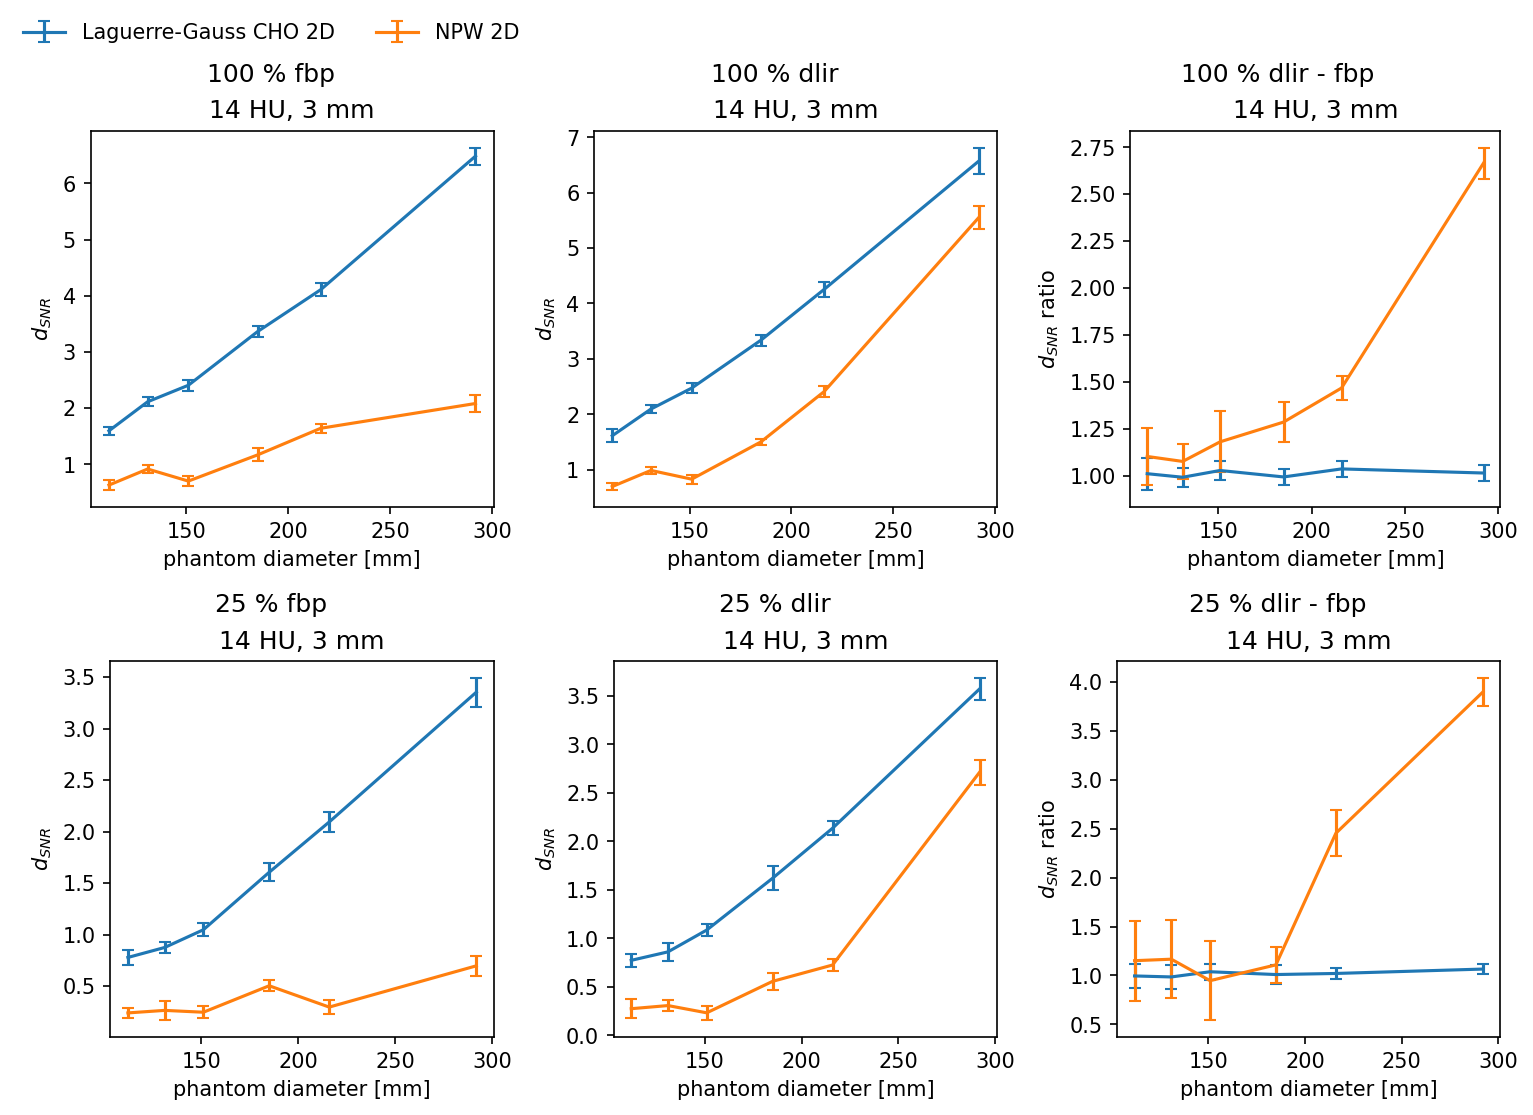

In [33]:
plotter.dose_levels = [100, 25]
plotter.plot(restype='snr', x='diameter', recon_cmp_method='div')

{'fig0': [<matplotlib.figure.SubFigure at 0x7f41ff5f5580>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>],
        dtype=object)],
 'fig1': [<matplotlib.figure.SubFigure at 0x7f41ff5f57f0>,
  array([<AxesSubplot: title={'center': '14 HU, 3 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>,
         <AxesSubplot: title={'center': '7 HU, 5 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>,
         <AxesSubplot: title={'center': '5 HU, 7 mm'}, xlabel='phantom diameter [mm]', ylabel='$d_{SNR}$ ratio'>,
         <AxesSubplot: title={'center': '3 HU, 10 mm'}, 

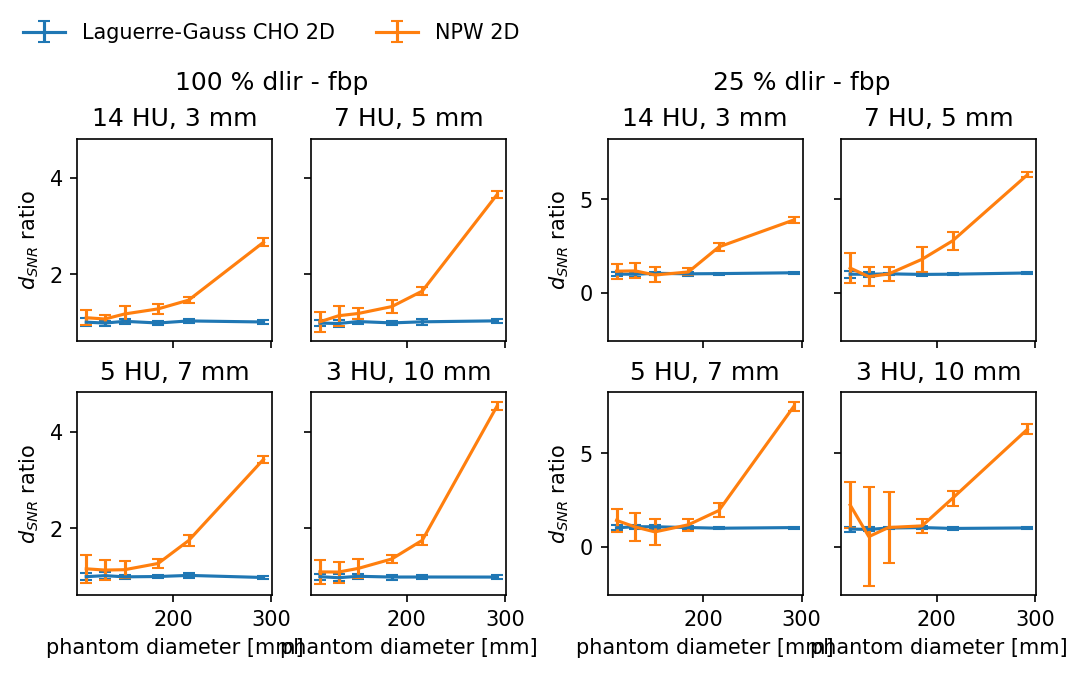

In [34]:
plotter.dose_levels = [100, 25]
plotter.insert_HUs = [14, 7, 5, 3]
plotter.recons = [['dlir', 'fbp']]
plotter.plot(restype='snr', x='diameter', recon_cmp_method='div', transpose = True)

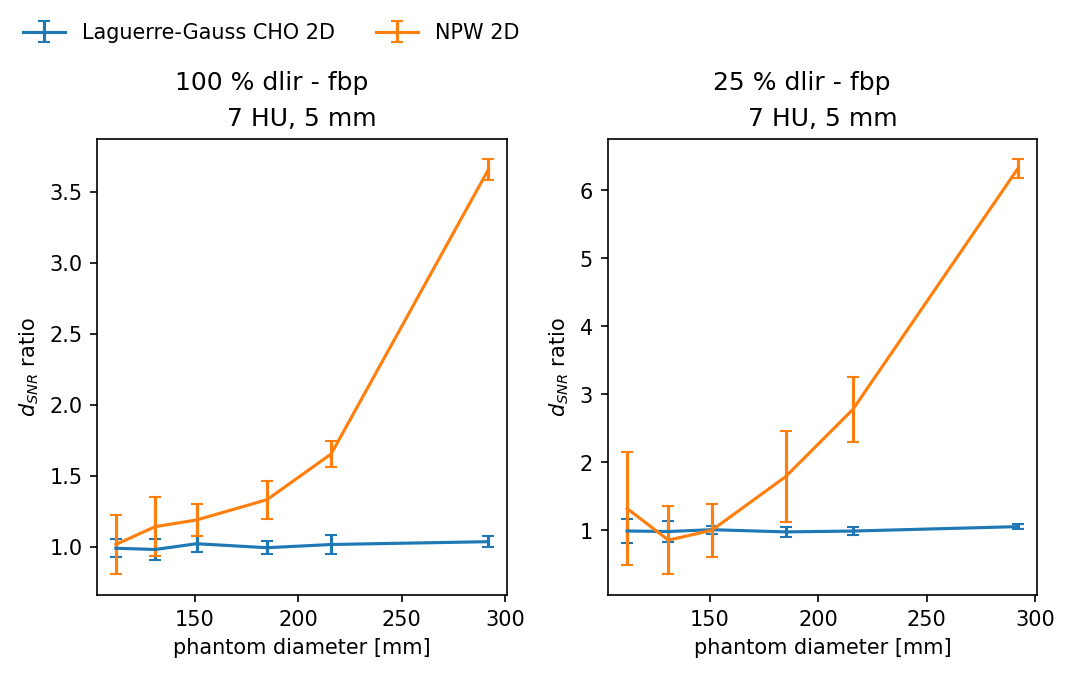

In [35]:
plotter.insert_HUs = 7
plotter.recons = [['dlir', 'fbp']]
fig_dict = plotter.plot(restype='snr', x='diameter', recon_cmp_method='div', transpose = True)

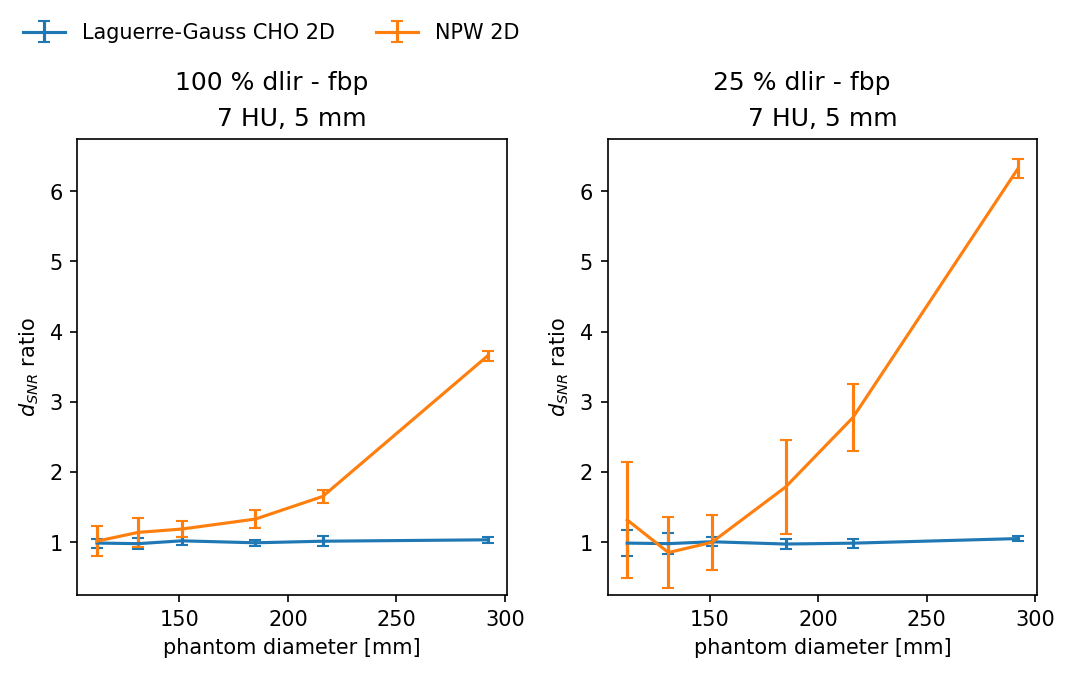

In [36]:
ylim = (0.25, 6.75)
fig_dict = plotter.plot(restype='snr', x='diameter', recon_cmp_method='div', transpose = True)
fig_dict['fig0'][1][0].set_ylim(ylim)
fig_dict['fig1'][1][0].set_ylim(ylim)
plt.savefig("SNR_ratio_v_diameter.png", dpi=600)
# fig_dict['fig0'][1][0].get_legend()